In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import fastf1 as f1
from fastf1 import plotting
from ing_theme_matplotlib import mpl_style
import mplcyberpunk

In [2]:
def convert_to_normal(time):
    if pd.isna(time):
        return time

    time_str = str(time)
    parts = time_str.split()

    days = int(parts[0])
    minutes, seconds_with_microseconds = parts[2].split(":")[1:]
    seconds, microseconds = seconds_with_microseconds.split(".")

    minutes = int(minutes)
    seconds = int(seconds)
    microseconds = int(microseconds)

    total_microseconds = (
        days * 86400000000 + minutes * 60000000 + seconds * 1000000 + microseconds
    )

    minutes, remaining_microseconds = divmod(total_microseconds, 60000000)
    seconds, microseconds = divmod(remaining_microseconds, 1000000)

    normal_time = f"{minutes:02d}:{seconds:02d}.{microseconds:06d}"
    return normal_time

*Sprint Qualifying*

In [3]:
SpQuali = f1.get_session(2025, "China", "Sprint Qualifying")
SpQuali.load()

req         WARNING 	DEFAULT CACHE ENABLED! (421.2 MB) /home/hexa/.cache/fastf1


core           INFO 	Loading data for Chinese Grand Prix - Sprint Qualifying [v3.5.3]


req            INFO 	Using cached data for session_info


req            INFO 	Using cached data for driver_info


core        WARNING 	Sprint Qualifying is not supported by Ergast! Limited results are calculated from timing data.


req            INFO 	Using cached data for session_status_data


req            INFO 	Using cached data for track_status_data


req            INFO 	Using cached data for _extended_timing_data


req            INFO 	Using cached data for timing_app_data


core           INFO 	Processing timing data...


req            INFO 	Using cached data for car_data


req            INFO 	Using cached data for position_data


req            INFO 	Using cached data for weather_data


req            INFO 	Using cached data for race_control_messages


core           INFO 	Finished loading data for 20 drivers: ['44', '1', '81', '16', '63', '4', '12', '22', '23', '18', '14', '87', '55', '5', '6', '7', '10', '31', '27', '30']


In [4]:
SpQuali.session_info

{'Meeting': {'Key': 1255,
  'Name': 'Chinese Grand Prix',
  'OfficialName': 'FORMULA 1 HEINEKEN CHINESE GRAND PRIX 2025',
  'Location': 'Shanghai',
  'Number': 2,
  'Country': {'Key': 53, 'Code': 'CHN', 'Name': 'China'},
  'Circuit': {'Key': 49, 'ShortName': 'Shanghai'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9989,
 'Type': 'Qualifying',
 'Name': 'Sprint Qualifying',
 'StartDate': datetime.datetime(2025, 3, 21, 15, 30),
 'EndDate': datetime.datetime(2025, 3, 21, 16, 14),
 'GmtOffset': datetime.timedelta(seconds=28800),
 'Path': '2025/2025-03-23_Chinese_Grand_Prix/2025-03-21_Sprint_Qualifying/'}

In [5]:
SpQuali.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
44,HAM,Ferrari,NaN,1.0,NaT,
1,VER,Red Bull Racing,NaN,2.0,NaT,
81,PIA,McLaren,NaN,3.0,NaT,
16,LEC,Ferrari,NaN,4.0,NaT,
63,RUS,Mercedes,NaN,5.0,NaT,
4,NOR,McLaren,NaN,6.0,NaT,
12,ANT,Mercedes,NaN,7.0,NaT,
22,TSU,Racing Bulls,NaN,8.0,NaT,
23,ALB,Williams,NaN,9.0,NaT,
18,STR,Aston Martin,NaN,10.0,NaT,


In [6]:
SpQuali_laps = SpQuali.laps
SpQuali_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:16:57.349000,NOR,4,NaT,1.0,1.0,0 days 00:14:48.482000,NaT,NaT,0 days 00:00:35.498000,...,True,McLaren,0 days 00:14:48.482000,2025-03-21 07:32:20.802,1,NaN,False,,False,False
1,0 days 00:18:29.597000,NOR,4,0 days 00:01:32.248000,2.0,1.0,NaT,NaT,0 days 00:00:24.618000,0 days 00:00:27.789000,...,True,McLaren,0 days 00:16:57.349000,2025-03-21 07:34:29.669,1,NaN,False,,False,True
2,0 days 00:20:32.738000,NOR,4,0 days 00:02:03.141000,3.0,1.0,NaT,NaT,0 days 00:00:34.193000,0 days 00:00:38.202000,...,True,McLaren,0 days 00:18:29.597000,2025-03-21 07:36:01.917,1,NaN,False,,False,True
3,0 days 00:22:38.639000,NOR,4,0 days 00:02:05.901000,4.0,1.0,NaT,NaT,0 days 00:00:38.528000,0 days 00:00:35.518000,...,True,McLaren,0 days 00:20:32.738000,2025-03-21 07:38:05.058,1,NaN,False,,False,True
4,0 days 00:24:10.035000,NOR,4,0 days 00:01:31.396000,5.0,1.0,NaT,NaT,0 days 00:00:24.207000,0 days 00:00:27.555000,...,True,McLaren,0 days 00:22:38.639000,2025-03-21 07:40:10.959,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0 days 00:17:06.350000,DOO,7,0 days 00:01:33.129000,2.0,1.0,NaT,NaT,0 days 00:00:24.791000,0 days 00:00:28.114000,...,True,Alpine,0 days 00:15:33.221000,2025-03-21 07:33:05.541,1,NaN,False,,False,True
213,0 days 00:19:08.929000,DOO,7,0 days 00:02:02.579000,3.0,1.0,NaT,NaT,0 days 00:00:31.130000,0 days 00:00:37.759000,...,True,Alpine,0 days 00:17:06.350000,2025-03-21 07:34:38.670,1,NaN,False,,False,True
214,0 days 00:21:15.101000,DOO,7,0 days 00:02:06.172000,4.0,1.0,NaT,NaT,0 days 00:00:33.351000,0 days 00:00:37.366000,...,True,Alpine,0 days 00:19:08.929000,2025-03-21 07:36:41.249,1,NaN,False,,False,True
215,0 days 00:22:47.676000,DOO,7,0 days 00:01:32.575000,5.0,1.0,NaT,NaT,0 days 00:00:24.609000,0 days 00:00:27.945000,...,True,Alpine,0 days 00:21:15.101000,2025-03-21 07:38:47.421,1,NaN,False,,False,True


In [7]:
ham_SpQuali_laps = SpQuali.laps.pick_driver("HAM")
fastest_lap_ham_SpQuali = ham_SpQuali_laps.pick_fastest().LapTime
ham_SpQuali_lap_time = ham_SpQuali_laps["LapTime"]
ham_SpQuali_sec1 = ham_SpQuali_laps["Sector1Time"]
ham_SpQuali_sec2 = ham_SpQuali_laps["Sector2Time"]
ham_SpQuali_sec3 = ham_SpQuali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ham_SpQuali), "which was in Lap number" ,ham_SpQuali_laps.pick_fastest().LapNumber)
ham_SpQuali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:30.849000 which was in Lap number 14.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
41,NaT,NaT,0 days 00:00:34.593000,0 days 00:00:47.850000,254.0,241.0,266.0,307.0
42,0 days 00:01:32.229000,0 days 00:00:24.608000,0 days 00:00:27.763000,0 days 00:00:39.858000,281.0,277.0,266.0,332.0
43,0 days 00:02:14.596000,0 days 00:00:34.163000,0 days 00:00:39.492000,0 days 00:01:00.941000,200.0,224.0,NaN,297.0
44,NaT,NaT,0 days 00:00:36.462000,0 days 00:00:50.328000,252.0,245.0,266.0,292.0
45,0 days 00:01:31.212000,0 days 00:00:24.415000,0 days 00:00:27.428000,0 days 00:00:39.369000,280.0,276.0,272.0,335.0


In [8]:
fastest_lap_ham_SpQuali = ham_SpQuali_laps.pick_fastest()
tele_ham_SpQuali = fastest_lap_ham_SpQuali.get_telemetry().add_distance()
speed_ham_SpQuali = tele_ham_SpQuali.Speed
tele_ham_SpQuali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,275.386933,7,11041.969786
3,276.371856,7,11078.165707
4,278.000000,7,11138.000000
5,279.423484,7,11187.466077
6,282.000000,7,11277.000000
...,...,...,...
689,267.000000,7,10804.000000
690,270.114998,7,10906.349926
691,274.000000,7,11034.000000
692,274.374997,7,11044.649924


In [9]:
ver_SpQuali_laps = SpQuali.laps.pick_driver("VER")
fastest_lap_ver_SpQuali = ver_SpQuali_laps.pick_fastest().LapTime
ver_SpQuali_lap_time = ver_SpQuali_laps["LapTime"]
ver_SpQuali_sec1 = ver_SpQuali_laps["Sector1Time"]
ver_SpQuali_sec2 = ver_SpQuali_laps["Sector2Time"]
ver_SpQuali_sec3 = ver_SpQuali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_SpQuali), "which was in Lap number" ,ver_SpQuali_laps.pick_fastest().LapNumber)
ver_SpQuali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:30.867000 which was in Lap number 11.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
174,NaT,NaT,0 days 00:00:32.457000,0 days 00:00:52.515000,265.0,258.0,268.0,259.0
175,0 days 00:01:32.329000,0 days 00:00:24.576000,0 days 00:00:27.770000,0 days 00:00:39.983000,281.0,274.0,268.0,334.0
176,0 days 00:02:09.537000,0 days 00:00:35.643000,0 days 00:00:38.240000,0 days 00:00:55.654000,161.0,196.0,NaN,248.0
177,NaT,NaT,0 days 00:00:37.092000,0 days 00:00:48.750000,208.0,210.0,270.0,255.0
178,0 days 00:01:31.916000,0 days 00:00:24.533000,0 days 00:00:27.634000,0 days 00:00:39.749000,281.0,274.0,268.0,336.0


In [10]:
fastest_lap_ver_SpQuali = ver_SpQuali_laps.pick_fastest()
tele_ver_SpQuali = fastest_lap_ver_SpQuali.get_telemetry().add_distance()
speed_ver_SpQuali = tele_ver_SpQuali.Speed
tele_ver_SpQuali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,277.666667,7,11042.166667
3,279.949999,7,11123.224962
4,280.000000,7,11125.000000
5,282.959090,7,11232.513605
6,286.000000,7,11343.000000
...,...,...,...
670,267.449997,6,10998.575277
671,270.000000,7,10778.000000
672,273.000000,7,10854.000000
673,273.621427,7,10875.542810


In [11]:
pia_SpQuali_laps = SpQuali.laps.pick_driver("PIA")
fastest_lap_pia_SpQuali = pia_SpQuali_laps.pick_fastest().LapTime
pia_SpQuali_lap_time = pia_SpQuali_laps["LapTime"]
pia_SpQuali_sec1 = pia_SpQuali_laps["Sector1Time"]
pia_SpQuali_sec2 = pia_SpQuali_laps["Sector2Time"]
pia_SpQuali_sec3 = pia_SpQuali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_pia_SpQuali), "which was in Lap number" ,pia_SpQuali_laps.pick_fastest().LapNumber)
pia_SpQuali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:30.929000 which was in Lap number 10.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
28,NaT,NaT,0 days 00:00:33.483000,0 days 00:00:53.414000,202.0,249.0,268.0,300.0
29,0 days 00:01:31.723000,0 days 00:00:24.509000,0 days 00:00:27.478000,0 days 00:00:39.736000,280.0,275.0,271.0,331.0
30,0 days 00:02:06.296000,0 days 00:00:35.311000,0 days 00:00:37.641000,0 days 00:00:53.344000,204.0,183.0,196.0,242.0
31,0 days 00:02:21.861000,0 days 00:00:36.805000,0 days 00:00:37.458000,0 days 00:01:07.598000,228.0,223.0,NaN,104.0
32,NaT,NaT,0 days 00:00:32.932000,0 days 00:00:47.569000,259.0,249.0,270.0,310.0


In [12]:
fastest_lap_pia_SpQuali = pia_SpQuali_laps.pick_fastest()
tele_pia_SpQuali = fastest_lap_pia_SpQuali.get_telemetry().add_distance()
speed_pia_SpQuali = tele_pia_SpQuali.Speed
tele_pia_SpQuali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,276.114999,7,10993.664964
3,277.000000,7,11027.000000
4,278.974998,7,11102.049939
5,280.000000,7,11141.000000
6,280.000000,7,11211.069908
...,...,...,...
692,269.993749,7,10873.549722
693,270.000000,7,10875.000000
694,273.000000,7,10923.000000
695,273.329166,7,10945.383279


In [13]:
rus_SpQuali_laps = SpQuali.laps.pick_driver("RUS")
fastest_lap_rus_SpQuali = rus_SpQuali_laps.pick_fastest().LapTime
rus_SpQuali_lap_time = rus_SpQuali_laps["LapTime"]
rus_SpQuali_sec1 = rus_SpQuali_laps["Sector1Time"]
rus_SpQuali_sec2 = rus_SpQuali_laps["Sector2Time"]
rus_SpQuali_sec3 = rus_SpQuali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_rus_SpQuali), "which was in Lap number" ,rus_SpQuali_laps.pick_fastest().LapNumber)
rus_SpQuali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:31.169000 which was in Lap number 17.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
56,NaT,NaT,0 days 00:00:31.439000,0 days 00:00:49.961000,273.0,269.0,260.0,331.0
57,0 days 00:01:58.797000,0 days 00:00:28.751000,0 days 00:00:35.028000,0 days 00:00:55.018000,256.0,261.0,271.0,153.0
58,0 days 00:02:04.138000,0 days 00:00:28.475000,0 days 00:00:41.875000,0 days 00:00:53.788000,191.0,225.0,272.0,168.0
59,0 days 00:01:32.290000,0 days 00:00:24.711000,0 days 00:00:27.771000,0 days 00:00:39.808000,280.0,277.0,269.0,334.0
60,0 days 00:02:05.980000,0 days 00:00:35.947000,0 days 00:00:37.086000,0 days 00:00:52.947000,251.0,245.0,222.0,259.0


In [14]:
fastest_lap_rus_SpQuali = rus_SpQuali_laps.pick_fastest()
tele_rus_SpQuali = fastest_lap_rus_SpQuali.get_telemetry().add_distance()
speed_rus_SpQuali = tele_rus_SpQuali.Speed
tele_rus_SpQuali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,280.162499,7,11417.356206
3,281.000000,7,11463.000000
4,281.067856,7,11473.721320
5,281.635714,7,11563.442785
6,282.000000,7,11621.000000
...,...,...,...
699,274.000000,7,11271.000000
700,274.487499,7,11327.549907
701,275.000000,7,11387.000000
702,278.000000,7,11475.000000


In [15]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Lewis Hamilton"] * len(ham_SpQuali_sec1),
        "Sector1Time": ham_SpQuali_sec1,
        "Sector2Time": ham_SpQuali_sec2,
        "Sector3Time": ham_SpQuali_sec3,
        "Lap Time": ham_SpQuali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_SpQuali_sec1),
        "Sector1Time": ver_SpQuali_sec1,
        "Sector2Time": ver_SpQuali_sec2,
        "Sector3Time": ver_SpQuali_sec3,
        "Lap Time": ver_SpQuali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_SpQuali_sec1),
        "Sector1Time": pia_SpQuali_sec1,
        "Sector2Time": pia_SpQuali_sec2,
        "Sector3Time": pia_SpQuali_sec3,
        "Lap Time": pia_SpQuali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_SpQuali_sec1),
        "Sector1Time": rus_SpQuali_sec1,
        "Sector2Time": rus_SpQuali_sec2,
        "Sector3Time": rus_SpQuali_sec3,
        "Lap Time": rus_SpQuali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Lewis Hamilton,0 days 00:00:24.608000,0 days 00:00:27.763000,0 days 00:00:39.858000,0 days 00:01:32.229000
2,Lewis Hamilton,0 days 00:00:34.163000,0 days 00:00:39.492000,0 days 00:01:00.941000,0 days 00:02:14.596000
4,Lewis Hamilton,0 days 00:00:24.415000,0 days 00:00:27.428000,0 days 00:00:39.369000,0 days 00:01:31.212000
5,Lewis Hamilton,0 days 00:00:29.786000,0 days 00:00:35.664000,0 days 00:00:59.236000,0 days 00:02:04.686000
7,Lewis Hamilton,0 days 00:00:24.448000,0 days 00:00:27.864000,0 days 00:00:39.813000,0 days 00:01:32.125000
8,Lewis Hamilton,0 days 00:00:35.523000,0 days 00:00:39.258000,0 days 00:00:51.704000,0 days 00:02:06.485000
9,Lewis Hamilton,0 days 00:00:38.317000,0 days 00:00:35.687000,0 days 00:00:55.350000,0 days 00:02:09.354000
10,Lewis Hamilton,0 days 00:00:24.355000,0 days 00:00:27.383000,0 days 00:00:39.646000,0 days 00:01:31.384000
11,Lewis Hamilton,0 days 00:00:32.224000,0 days 00:00:36.115000,0 days 00:00:54.717000,0 days 00:02:03.056000
13,Lewis Hamilton,0 days 00:00:24.261000,0 days 00:00:27.249000,0 days 00:00:39.339000,0 days 00:01:30.849000


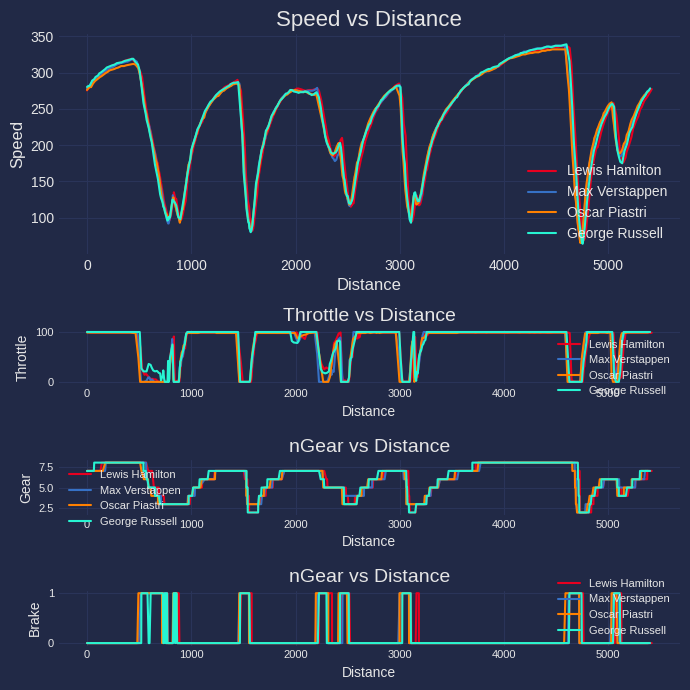

In [16]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = SpQuali.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(4, 1, figsize=(7, 7), gridspec_kw={"height_ratios": [4, 1, 1, 1]})

ax[0].plot(
    tele_ham_SpQuali.Distance, tele_ham_SpQuali.Speed, label="Lewis Hamilton", color=get_driver_color("HAM")
)
ax[0].plot(
    tele_ver_SpQuali.Distance, tele_ver_SpQuali.Speed, label="Max Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_pia_SpQuali.Distance, tele_pia_SpQuali.Speed, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[0].plot(
    tele_rus_SpQuali.Distance, tele_rus_SpQuali.Speed, label="George Russell", color=get_driver_color("RUS")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)
ax[1].plot(
    tele_ham_SpQuali.Distance, tele_ham_SpQuali.Throttle, label="Lewis Hamilton", color=get_driver_color("HAM")
)
ax[1].plot(
    tele_ver_SpQuali.Distance, tele_ver_SpQuali.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_pia_SpQuali.Distance, tele_pia_SpQuali.Throttle, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[1].plot(
    tele_rus_SpQuali.Distance, tele_rus_SpQuali.Throttle, label="George Russell", color=get_driver_color("RUS")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)
ax[2].plot(
    tele_ham_SpQuali.Distance, tele_ham_SpQuali.nGear, label="Lewis Hamilton", color=get_driver_color("HAM")
)
ax[2].plot(
    tele_ver_SpQuali.Distance, tele_ver_SpQuali.nGear, label="Max Verstappen", color=get_driver_color("VER")
)
ax[2].plot(
    tele_pia_SpQuali.Distance, tele_pia_SpQuali.nGear, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[2].plot(
    tele_rus_SpQuali.Distance, tele_rus_SpQuali.nGear, label="George Russell", color=get_driver_color("RUS")
)

ax[2].set_title("nGear vs Distance", fontsize=14)
ax[2].set_xlabel("Distance", fontsize=10)
ax[2].set_ylabel("Gear", fontsize=10)
ax[2].legend(fontsize=8)
ax[2].grid(True)
ax[2].tick_params(axis="both", which="major", labelsize=8)
ax[3].plot(
    tele_ham_SpQuali.Distance, tele_ham_SpQuali.Brake, label="Lewis Hamilton", color=get_driver_color("HAM")
)
ax[3].plot(
    tele_ver_SpQuali.Distance, tele_ver_SpQuali.Brake, label="Max Verstappen", color=get_driver_color("VER")
)
ax[3].plot(
    tele_pia_SpQuali.Distance, tele_pia_SpQuali.Brake, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[3].plot(
    tele_rus_SpQuali.Distance, tele_rus_SpQuali.Brake, label="George Russell", color=get_driver_color("RUS")
)

ax[3].set_title("nGear vs Distance", fontsize=14)
ax[3].set_xlabel("Distance", fontsize=10)
ax[3].set_ylabel("Brake", fontsize=10)
ax[3].legend(fontsize=8)
ax[3].grid(True)
ax[3].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


In [17]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Lewis Hamilton"] * len(ham_SpQuali_sec1),
        "Sector1Time": ham_SpQuali_sec1,
        "Sector2Time": ham_SpQuali_sec2,
        "Sector3Time": ham_SpQuali_sec3,
        "Lap Time": ham_SpQuali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_SpQuali_sec1),
        "Sector1Time": ver_SpQuali_sec1,
        "Sector2Time": ver_SpQuali_sec2,
        "Sector3Time": ver_SpQuali_sec3,
        "Lap Time": ver_SpQuali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_SpQuali_sec1),
        "Sector1Time": pia_SpQuali_sec1,
        "Sector2Time": pia_SpQuali_sec2,
        "Sector3Time": pia_SpQuali_sec3,
        "Lap Time": pia_SpQuali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_SpQuali_sec1),
        "Sector1Time": rus_SpQuali_sec1,
        "Sector2Time": rus_SpQuali_sec2,
        "Sector3Time": rus_SpQuali_sec3,
        "Lap Time": rus_SpQuali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Lewis Hamilton,0 days 00:00:24.608000,0 days 00:00:27.763000,0 days 00:00:39.858000,0 days 00:01:32.229000
2,Lewis Hamilton,0 days 00:00:34.163000,0 days 00:00:39.492000,0 days 00:01:00.941000,0 days 00:02:14.596000
4,Lewis Hamilton,0 days 00:00:24.415000,0 days 00:00:27.428000,0 days 00:00:39.369000,0 days 00:01:31.212000
5,Lewis Hamilton,0 days 00:00:29.786000,0 days 00:00:35.664000,0 days 00:00:59.236000,0 days 00:02:04.686000
7,Lewis Hamilton,0 days 00:00:24.448000,0 days 00:00:27.864000,0 days 00:00:39.813000,0 days 00:01:32.125000
8,Lewis Hamilton,0 days 00:00:35.523000,0 days 00:00:39.258000,0 days 00:00:51.704000,0 days 00:02:06.485000
9,Lewis Hamilton,0 days 00:00:38.317000,0 days 00:00:35.687000,0 days 00:00:55.350000,0 days 00:02:09.354000
10,Lewis Hamilton,0 days 00:00:24.355000,0 days 00:00:27.383000,0 days 00:00:39.646000,0 days 00:01:31.384000
11,Lewis Hamilton,0 days 00:00:32.224000,0 days 00:00:36.115000,0 days 00:00:54.717000,0 days 00:02:03.056000
13,Lewis Hamilton,0 days 00:00:24.261000,0 days 00:00:27.249000,0 days 00:00:39.339000,0 days 00:01:30.849000


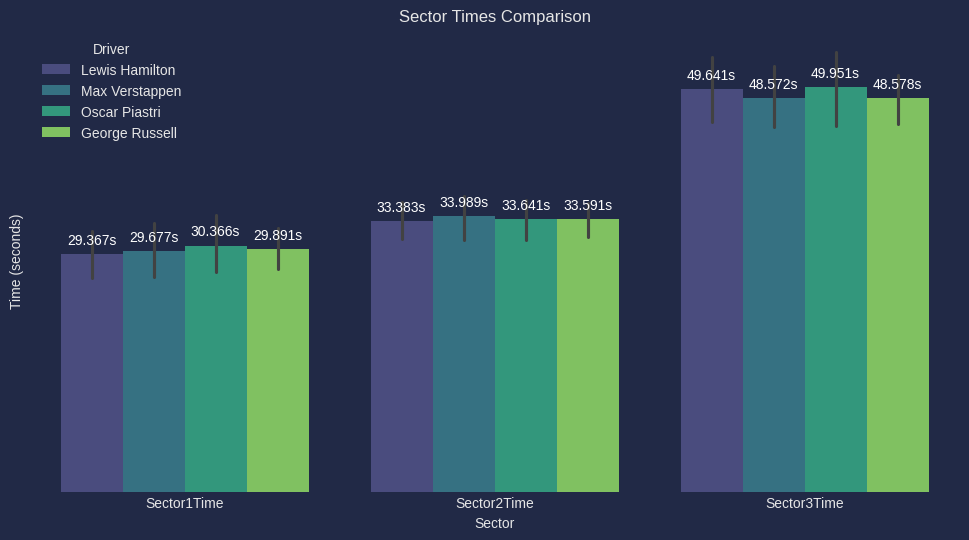

In [18]:
melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

melted_data["Time"] = melted_data["Time"].dt.total_seconds()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(
    data=melted_data, x="Sector", y="Time", hue="Driver", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        bar_plot.annotate(
            f"{height:.3f}s",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
        va="bottom",
            fontsize=10,
            color="white",
            xytext=(0, 5),
            textcoords="offset points",
        )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Sector")
plt.gca().set_yticks([])
plt.show()

*Sprint Race*

In [19]:
sprint = f1.get_session(2025, "China", "Sprint")
sprint.load()

core           INFO 	Loading data for Chinese Grand Prix - Sprint [v3.5.3]


req            INFO 	Using cached data for session_info


req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data


req            INFO 	Using cached data for lap_count


req            INFO 	Using cached data for track_status_data


req            INFO 	Using cached data for _extended_timing_data


req            INFO 	Using cached data for timing_app_data


core           INFO 	Processing timing data...


req            INFO 	Using cached data for car_data


req            INFO 	Using cached data for position_data


req            INFO 	Using cached data for weather_data


req            INFO 	Using cached data for race_control_messages


core        WARNING 	Driver 44 completed the race distance 00:00.020000 before the recorded end of the session.


core           INFO 	Finished loading data for 20 drivers: ['44', '81', '1', '63', '16', '22', '12', '4', '18', '14', '23', '10', '6', '30', '87', '31', '55', '5', '27', '7']


In [20]:
sprint.session_info

{'Meeting': {'Key': 1255,
  'Name': 'Chinese Grand Prix',
  'OfficialName': 'FORMULA 1 HEINEKEN CHINESE GRAND PRIX 2025',
  'Location': 'Shanghai',
  'Number': 2,
  'Country': {'Key': 53, 'Code': 'CHN', 'Name': 'China'},
  'Circuit': {'Key': 49, 'ShortName': 'Shanghai'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9993,
 'Type': 'Race',
 'Name': 'Sprint',
 'StartDate': datetime.datetime(2025, 3, 22, 11, 0),
 'EndDate': datetime.datetime(2025, 3, 22, 12, 0),
 'GmtOffset': datetime.timedelta(seconds=28800),
 'Path': '2025/2025-03-23_Chinese_Grand_Prix/2025-03-22_Sprint/'}

In [21]:
sprint.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
44,HAM,Ferrari,1.0,1.0,0 days 00:30:39.965000,Finished
81,PIA,McLaren,3.0,2.0,0 days 00:00:06.889000,Finished
1,VER,Red Bull Racing,2.0,3.0,0 days 00:00:09.804000,Finished
63,RUS,Mercedes,5.0,4.0,0 days 00:00:11.592000,Finished
16,LEC,Ferrari,4.0,5.0,0 days 00:00:12.190000,Finished
22,TSU,Racing Bulls,8.0,6.0,0 days 00:00:22.288000,Finished
12,ANT,Mercedes,7.0,7.0,0 days 00:00:23.038000,Finished
4,NOR,McLaren,6.0,8.0,0 days 00:00:23.471000,Finished
18,STR,Aston Martin,10.0,9.0,0 days 00:00:24.916000,Finished
14,ALO,Aston Martin,11.0,10.0,0 days 00:00:38.218000,Finished


In [22]:
sprint_laps = sprint.laps
sprint_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:46:50.347000,HAM,44,NaT,1.0,1.0,NaT,NaT,NaT,0 days 00:00:28.492000,...,False,Ferrari,0 days 00:45:13.457000,2025-03-22 03:03:44.623,1,1.0,False,,False,False
1,0 days 00:48:25.746000,HAM,44,0 days 00:01:35.399000,2.0,1.0,NaT,NaT,0 days 00:00:25.591000,0 days 00:00:28.731000,...,False,Ferrari,0 days 00:46:50.347000,2025-03-22 03:05:21.513,1,1.0,False,,False,True
2,0 days 00:50:01.897000,HAM,44,0 days 00:01:36.151000,3.0,1.0,NaT,NaT,0 days 00:00:25.832000,0 days 00:00:29.044000,...,False,Ferrari,0 days 00:48:25.746000,2025-03-22 03:06:56.912,1,1.0,False,,False,True
3,0 days 00:51:37.961000,HAM,44,0 days 00:01:36.064000,4.0,1.0,NaT,NaT,0 days 00:00:25.776000,0 days 00:00:29.077000,...,False,Ferrari,0 days 00:50:01.897000,2025-03-22 03:08:33.063,1,1.0,False,,False,True
4,0 days 00:53:14.645000,HAM,44,0 days 00:01:36.684000,5.0,1.0,NaT,NaT,0 days 00:00:25.952000,0 days 00:00:29.259000,...,False,Ferrari,0 days 00:51:37.961000,2025-03-22 03:10:09.127,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0 days 01:10:04.743000,DOO,7,0 days 00:01:40.804000,15.0,1.0,NaT,NaT,0 days 00:00:27.017000,0 days 00:00:30.935000,...,False,Alpine,0 days 01:08:23.939000,2025-03-22 03:26:55.105,1,19.0,False,,False,True
376,0 days 01:11:43.352000,DOO,7,0 days 00:01:38.609000,16.0,1.0,NaT,NaT,0 days 00:00:26.391000,0 days 00:00:29.974000,...,False,Alpine,0 days 01:10:04.743000,2025-03-22 03:28:35.909,1,19.0,False,,False,True
377,0 days 01:13:21.997000,DOO,7,0 days 00:01:38.645000,17.0,1.0,NaT,NaT,0 days 00:00:26.412000,0 days 00:00:29.950000,...,False,Alpine,0 days 01:11:43.352000,2025-03-22 03:30:14.518,1,19.0,False,,False,True
378,0 days 01:15:01.655000,DOO,7,0 days 00:01:39.658000,18.0,1.0,NaT,NaT,0 days 00:00:26.474000,0 days 00:00:30.050000,...,False,Alpine,0 days 01:13:21.997000,2025-03-22 03:31:53.163,1,18.0,False,,False,True


In [23]:
ham_sprint_laps = sprint.laps.pick_driver("HAM")
fastest_lap_ham_sprint = ham_sprint_laps.pick_fastest().LapTime
ham_sprint_lap_time = ham_sprint_laps["LapTime"]
ham_sprint_sec1 = ham_sprint_laps["Sector1Time"]
ham_sprint_sec2 = ham_sprint_laps["Sector2Time"]
ham_sprint_sec3 = ham_sprint_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ham_sprint), "which was in Lap number" ,ham_sprint_laps.pick_fastest().LapNumber)
ham_sprint_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:35.399000 which was in Lap number 2.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:28.492000,0 days 00:00:41.109000,280.0,273.0,258.0,309.0
1,0 days 00:01:35.399000,0 days 00:00:25.591000,0 days 00:00:28.731000,0 days 00:00:41.077000,NaN,275.0,260.0,312.0
2,0 days 00:01:36.151000,0 days 00:00:25.832000,0 days 00:00:29.044000,0 days 00:00:41.275000,276.0,271.0,262.0,310.0
3,0 days 00:01:36.064000,0 days 00:00:25.776000,0 days 00:00:29.077000,0 days 00:00:41.211000,278.0,271.0,261.0,309.0
4,0 days 00:01:36.684000,0 days 00:00:25.952000,0 days 00:00:29.259000,0 days 00:00:41.473000,276.0,270.0,261.0,309.0


In [24]:
fastest_lap_ham_sprint = ham_sprint_laps.pick_fastest()
tele_ham_sprint = fastest_lap_ham_sprint.get_telemetry().add_distance()
speed_ham_sprint = tele_ham_sprint.Speed
tele_ham_sprint.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,263.217858,7,10813.842754
3,263.228571,7,10812.228571
4,264.000000,7,10696.000000
5,266.400000,7,10770.400000
6,268.000000,7,10820.000000
...,...,...,...
717,256.000000,6,11731.000000
718,259.120000,6,11028.480000
719,262.000000,7,10380.000000
720,262.100000,7,10388.440000


In [25]:
pia_sprint_laps = sprint.laps.pick_driver("PIA")
fastest_lap_pia_sprint = pia_sprint_laps.pick_fastest().LapTime
pia_sprint_lap_time = pia_sprint_laps["LapTime"]
pia_sprint_sec1 = pia_sprint_laps["Sector1Time"]
pia_sprint_sec2 = pia_sprint_laps["Sector2Time"]
pia_sprint_sec3 = pia_sprint_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_pia_sprint), "which was in Lap number" ,pia_sprint_laps.pick_fastest().LapNumber)
pia_sprint_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:35.854000 which was in Lap number 7.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
19,NaT,NaT,0 days 00:00:29.176000,0 days 00:00:41.245000,283.0,272.0,262.0,309.0
20,0 days 00:01:36.086000,0 days 00:00:25.510000,0 days 00:00:29.217000,0 days 00:00:41.359000,273.0,275.0,261.0,315.0
21,0 days 00:01:36.116000,0 days 00:00:25.692000,0 days 00:00:29.207000,0 days 00:00:41.217000,271.0,271.0,264.0,315.0
22,0 days 00:01:35.893000,0 days 00:00:25.540000,0 days 00:00:29.178000,0 days 00:00:41.175000,272.0,269.0,264.0,314.0
23,0 days 00:01:36.349000,0 days 00:00:25.680000,0 days 00:00:29.397000,0 days 00:00:41.272000,273.0,270.0,264.0,315.0


In [26]:
fastest_lap_pia_sprint = pia_sprint_laps.pick_fastest()
tele_pia_sprint = fastest_lap_pia_sprint.get_telemetry().add_distance()
speed_pia_sprint = tele_pia_sprint.Speed
tele_pia_sprint.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,272.267858,7,11001.839323
3,273.178574,7,11031.892933
4,276.392855,7,11137.964210
5,277.000000,7,11158.000000
6,280.000000,7,11249.000000
...,...,...,...
711,264.000000,7,10738.000000
712,269.149997,7,10923.399885
713,272.000000,7,11026.000000
714,275.000000,7,11085.000000


In [27]:
ver_sprint_laps = sprint.laps.pick_driver("VER")
fastest_lap_ver_sprint = ver_sprint_laps.pick_fastest().LapTime
ver_sprint_lap_time = ver_sprint_laps["LapTime"]
ver_sprint_sec1 = ver_sprint_laps["Sector1Time"]
ver_sprint_sec2 = ver_sprint_laps["Sector2Time"]
ver_sprint_sec3 = ver_sprint_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_sprint), "which was in Lap number" ,ver_sprint_laps.pick_fastest().LapNumber)
ver_sprint_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:35.745000 which was in Lap number 2.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
38,NaT,NaT,0 days 00:00:28.705000,0 days 00:00:41.114000,282.0,275.0,262.0,311.0
39,0 days 00:01:35.745000,0 days 00:00:25.654000,0 days 00:00:28.886000,0 days 00:00:41.205000,279.0,275.0,261.0,317.0
40,0 days 00:01:35.997000,0 days 00:00:25.819000,0 days 00:00:28.967000,0 days 00:00:41.211000,280.0,273.0,263.0,317.0
41,0 days 00:01:36.083000,0 days 00:00:25.853000,0 days 00:00:29.087000,0 days 00:00:41.143000,283.0,274.0,263.0,316.0
42,0 days 00:01:36.728000,0 days 00:00:25.970000,0 days 00:00:29.374000,0 days 00:00:41.384000,282.0,273.0,263.0,316.0


In [28]:
fastest_lap_ver_sprint = ver_sprint_laps.pick_fastest()
tele_ver_sprint = fastest_lap_ver_sprint.get_telemetry().add_distance()
speed_ver_sprint = tele_ver_sprint.Speed
tele_ver_sprint.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,267.225002,7,10725.040036
3,268.862502,7,10761.720054
4,271.112502,7,10812.120054
5,272.000000,7,10832.000000
6,273.000000,7,10882.000000
...,...,...,...
717,259.000000,6,11533.000000
718,261.000000,6,11666.000000
719,261.704997,6,11697.959869
720,264.704997,6,11833.959869


In [29]:
rus_sprint_laps = sprint.laps.pick_driver("RUS")
fastest_lap_rus_sprint = rus_sprint_laps.pick_fastest().LapTime
rus_sprint_lap_time = rus_sprint_laps["LapTime"]
rus_sprint_sec1 = rus_sprint_laps["Sector1Time"]
rus_sprint_sec2 = rus_sprint_laps["Sector2Time"]
rus_sprint_sec3 = rus_sprint_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_rus_sprint), "which was in Lap number" ,rus_sprint_laps.pick_fastest().LapNumber)
rus_sprint_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:35.891000 which was in Lap number 4.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
57,NaT,NaT,0 days 00:00:29.662000,0 days 00:00:41.344000,287.0,276.0,259.0,326.0
58,0 days 00:01:36.432000,0 days 00:00:26.032000,0 days 00:00:29.221000,0 days 00:00:41.179000,275.0,272.0,262.0,319.0
59,0 days 00:01:36.045000,0 days 00:00:25.980000,0 days 00:00:28.756000,0 days 00:00:41.309000,281.0,270.0,265.0,314.0
60,0 days 00:01:35.891000,0 days 00:00:25.807000,0 days 00:00:28.981000,0 days 00:00:41.103000,274.0,271.0,266.0,317.0
61,0 days 00:01:36.394000,0 days 00:00:25.857000,0 days 00:00:29.251000,0 days 00:00:41.286000,275.0,273.0,264.0,317.0


In [30]:
fastest_lap_rus_sprint = rus_sprint_laps.pick_fastest()
tele_rus_sprint = fastest_lap_rus_sprint.get_telemetry().add_distance()
speed_rus_sprint = tele_rus_sprint.Speed
tele_rus_sprint.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,270.062500,7,11129.750000
3,270.546876,7,11151.062544
4,272.000000,7,11215.000000
5,272.837501,7,11236.216687
6,275.000000,7,11291.000000
...,...,...,...
720,264.277581,7,10932.597870
721,267.000000,7,10962.000000
722,267.837501,7,11008.481294
723,269.000000,7,11073.000000


In [31]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Lewis Hamilton"] * len(ham_sprint_sec1),
        "Sector1Time": ham_sprint_sec1,
        "Sector2Time": ham_sprint_sec2,
        "Sector3Time": ham_sprint_sec3,
        "Lap Time": ham_sprint_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_sprint_sec1),
        "Sector1Time": pia_sprint_sec1,
        "Sector2Time": pia_sprint_sec2,
        "Sector3Time": pia_sprint_sec3,
        "Lap Time": pia_sprint_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_sprint_sec1),
        "Sector1Time": ver_sprint_sec1,
        "Sector2Time": ver_sprint_sec2,
        "Sector3Time": ver_sprint_sec3,
        "Lap Time": ver_sprint_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_sprint_sec1),
        "Sector1Time": rus_sprint_sec1,
        "Sector2Time": rus_sprint_sec2,
        "Sector3Time": rus_sprint_sec3,
        "Lap Time": rus_sprint_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Lewis Hamilton,0 days 00:00:25.591000,0 days 00:00:28.731000,0 days 00:00:41.077000,0 days 00:01:35.399000
2,Lewis Hamilton,0 days 00:00:25.832000,0 days 00:00:29.044000,0 days 00:00:41.275000,0 days 00:01:36.151000
3,Lewis Hamilton,0 days 00:00:25.776000,0 days 00:00:29.077000,0 days 00:00:41.211000,0 days 00:01:36.064000
4,Lewis Hamilton,0 days 00:00:25.952000,0 days 00:00:29.259000,0 days 00:00:41.473000,0 days 00:01:36.684000
5,Lewis Hamilton,0 days 00:00:25.900000,0 days 00:00:28.936000,0 days 00:00:41.513000,0 days 00:01:36.349000
...,...,...,...,...,...
71,George Russell,0 days 00:00:26.533000,0 days 00:00:29.770000,0 days 00:00:42.001000,0 days 00:01:38.304000
72,George Russell,0 days 00:00:26.419000,0 days 00:00:29.882000,0 days 00:00:41.782000,0 days 00:01:38.083000
73,George Russell,0 days 00:00:26.472000,0 days 00:00:29.730000,0 days 00:00:41.984000,0 days 00:01:38.186000
74,George Russell,0 days 00:00:26.485000,0 days 00:00:29.719000,0 days 00:00:42.109000,0 days 00:01:38.313000


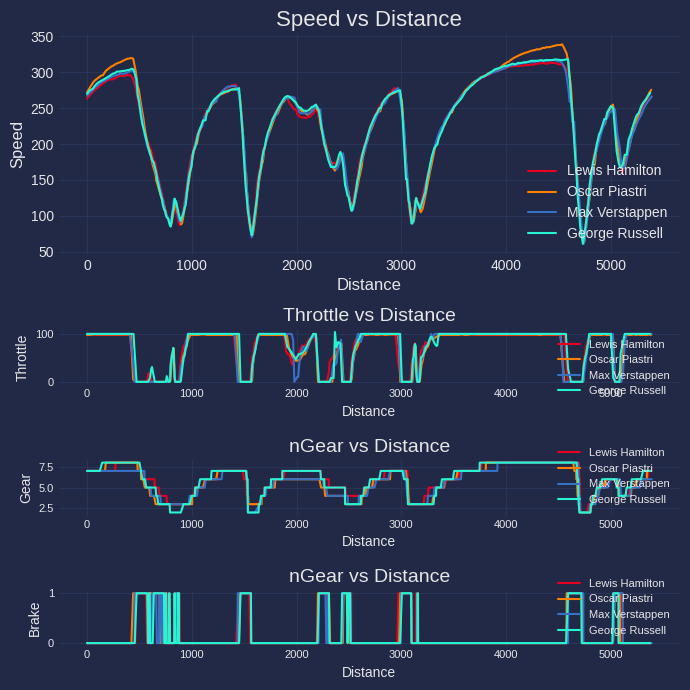

In [32]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = sprint.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(4, 1, figsize=(7, 7), gridspec_kw={"height_ratios": [4, 1, 1, 1]})

ax[0].plot(
    tele_ham_sprint.Distance, tele_ham_sprint.Speed, label="Lewis Hamilton", color=get_driver_color("HAM")
)
ax[0].plot(
    tele_pia_sprint.Distance, tele_pia_sprint.Speed, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[0].plot(
    tele_ver_sprint.Distance, tele_ver_sprint.Speed, label="Max Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_rus_sprint.Distance, tele_rus_sprint.Speed, label="George Russell", color=get_driver_color("RUS")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)
ax[1].plot(
    tele_ham_sprint.Distance, tele_ham_sprint.Throttle, label="Lewis Hamilton", color=get_driver_color("HAM")
)
ax[1].plot(
    tele_pia_sprint.Distance, tele_pia_sprint.Throttle, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[1].plot(
    tele_ver_sprint.Distance, tele_ver_sprint.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_rus_sprint.Distance, tele_rus_sprint.Throttle, label="George Russell", color=get_driver_color("RUS")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)
ax[2].plot(
    tele_ham_sprint.Distance, tele_ham_sprint.nGear, label="Lewis Hamilton", color=get_driver_color("HAM")
)
ax[2].plot(
    tele_pia_sprint.Distance, tele_pia_sprint.nGear, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[2].plot(
    tele_ver_sprint.Distance, tele_ver_sprint.nGear, label="Max Verstappen", color=get_driver_color("VER")
)
ax[2].plot(
    tele_rus_sprint.Distance, tele_rus_sprint.nGear, label="George Russell", color=get_driver_color("RUS")
)

ax[2].set_title("nGear vs Distance", fontsize=14)
ax[2].set_xlabel("Distance", fontsize=10)
ax[2].set_ylabel("Gear", fontsize=10)
ax[2].legend(fontsize=8)
ax[2].grid(True)
ax[2].tick_params(axis="both", which="major", labelsize=8)
ax[3].plot(
    tele_ham_sprint.Distance, tele_ham_sprint.Brake, label="Lewis Hamilton", color=get_driver_color("HAM")
)
ax[3].plot(
    tele_pia_sprint.Distance, tele_pia_sprint.Brake, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[3].plot(
    tele_ver_sprint.Distance, tele_ver_sprint.Brake, label="Max Verstappen", color=get_driver_color("VER")
)
ax[3].plot(
    tele_rus_sprint.Distance, tele_rus_sprint.Brake, label="George Russell", color=get_driver_color("RUS")
)

ax[3].set_title("nGear vs Distance", fontsize=14)
ax[3].set_xlabel("Distance", fontsize=10)
ax[3].set_ylabel("Brake", fontsize=10)
ax[3].legend(fontsize=8)
ax[3].grid(True)
ax[3].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


In [33]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Lewis Hamilton"] * len(ham_sprint_sec1),
        "Sector1Time": ham_sprint_sec1,
        "Sector2Time": ham_sprint_sec2,
        "Sector3Time": ham_sprint_sec3,
        "Lap Time": ham_sprint_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_sprint_sec1),
        "Sector1Time": pia_sprint_sec1,
        "Sector2Time": pia_sprint_sec2,
        "Sector3Time": pia_sprint_sec3,
        "Lap Time": pia_sprint_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_sprint_sec1),
        "Sector1Time": ver_sprint_sec1,
        "Sector2Time": ver_sprint_sec2,
        "Sector3Time": ver_sprint_sec3,
        "Lap Time": ver_sprint_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_sprint_sec1),
        "Sector1Time": rus_sprint_sec1,
        "Sector2Time": rus_sprint_sec2,
        "Sector3Time": rus_sprint_sec3,
        "Lap Time": rus_sprint_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Lewis Hamilton,0 days 00:00:25.591000,0 days 00:00:28.731000,0 days 00:00:41.077000,0 days 00:01:35.399000
2,Lewis Hamilton,0 days 00:00:25.832000,0 days 00:00:29.044000,0 days 00:00:41.275000,0 days 00:01:36.151000
3,Lewis Hamilton,0 days 00:00:25.776000,0 days 00:00:29.077000,0 days 00:00:41.211000,0 days 00:01:36.064000
4,Lewis Hamilton,0 days 00:00:25.952000,0 days 00:00:29.259000,0 days 00:00:41.473000,0 days 00:01:36.684000
5,Lewis Hamilton,0 days 00:00:25.900000,0 days 00:00:28.936000,0 days 00:00:41.513000,0 days 00:01:36.349000
...,...,...,...,...,...
71,George Russell,0 days 00:00:26.533000,0 days 00:00:29.770000,0 days 00:00:42.001000,0 days 00:01:38.304000
72,George Russell,0 days 00:00:26.419000,0 days 00:00:29.882000,0 days 00:00:41.782000,0 days 00:01:38.083000
73,George Russell,0 days 00:00:26.472000,0 days 00:00:29.730000,0 days 00:00:41.984000,0 days 00:01:38.186000
74,George Russell,0 days 00:00:26.485000,0 days 00:00:29.719000,0 days 00:00:42.109000,0 days 00:01:38.313000


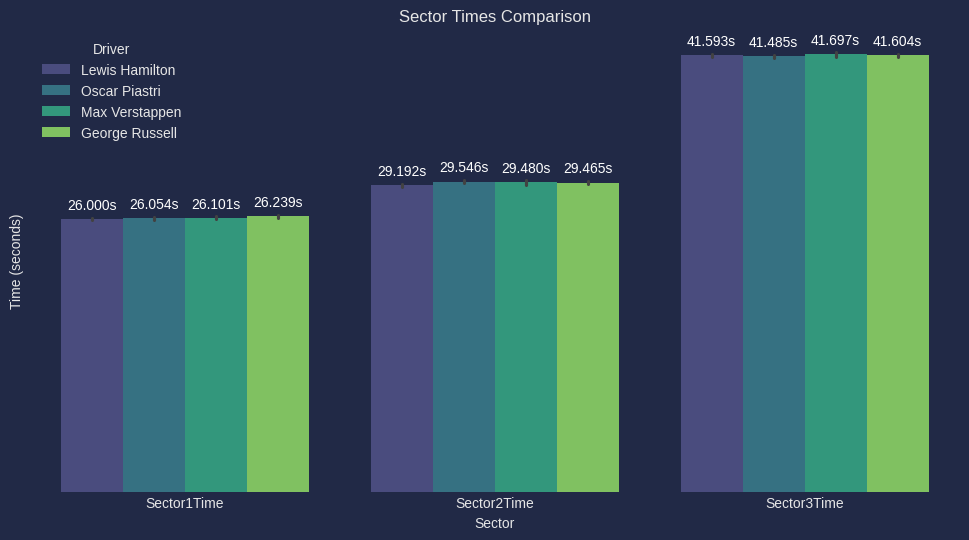

In [34]:
melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

melted_data["Time"] = melted_data["Time"].dt.total_seconds()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(
    data=melted_data, x="Sector", y="Time", hue="Driver", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        bar_plot.annotate(
            f"{height:.3f}s",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
        va="bottom",
            fontsize=10,
            color="white",
            xytext=(0, 5),
            textcoords="offset points",
        )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Sector")
plt.gca().set_yticks([])
plt.show()

*Qualifying*

In [35]:
quali = f1.get_session(2025, "China", "Qualifying")
quali.load()

core           INFO 	Loading data for Chinese Grand Prix - Qualifying [v3.5.3]


req            INFO 	Using cached data for session_info


req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data


req            INFO 	Using cached data for track_status_data


req            INFO 	Using cached data for _extended_timing_data


req            INFO 	Using cached data for timing_app_data


core           INFO 	Processing timing data...


req            INFO 	Using cached data for car_data


req            INFO 	Using cached data for position_data


req            INFO 	Using cached data for weather_data


req            INFO 	Using cached data for race_control_messages


core           INFO 	Finished loading data for 20 drivers: ['81', '63', '4', '1', '44', '16', '6', '12', '22', '23', '31', '27', '14', '18', '55', '10', '87', '7', '5', '30']


In [36]:
quali.session_info

{'Meeting': {'Key': 1255,
  'Name': 'Chinese Grand Prix',
  'OfficialName': 'FORMULA 1 HEINEKEN CHINESE GRAND PRIX 2025',
  'Location': 'Shanghai',
  'Number': 2,
  'Country': {'Key': 53, 'Code': 'CHN', 'Name': 'China'},
  'Circuit': {'Key': 49, 'ShortName': 'Shanghai'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9994,
 'Type': 'Qualifying',
 'Name': 'Qualifying',
 'StartDate': datetime.datetime(2025, 3, 22, 15, 0),
 'EndDate': datetime.datetime(2025, 3, 22, 16, 0),
 'GmtOffset': datetime.timedelta(seconds=28800),
 'Path': '2025/2025-03-23_Chinese_Grand_Prix/2025-03-22_Qualifying/'}

In [37]:
quali.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
81,PIA,McLaren,NaN,1.0,NaT,
63,RUS,Mercedes,NaN,2.0,NaT,
4,NOR,McLaren,NaN,3.0,NaT,
1,VER,Red Bull Racing,NaN,4.0,NaT,
44,HAM,Ferrari,NaN,5.0,NaT,
16,LEC,Ferrari,NaN,6.0,NaT,
6,HAD,Racing Bulls,NaN,7.0,NaT,
12,ANT,Mercedes,NaN,8.0,NaT,
22,TSU,Racing Bulls,NaN,9.0,NaT,
23,ALB,Williams,NaN,10.0,NaT,


In [38]:
quali_laps = quali.laps
quali_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:17:05.058000,PIA,81,NaT,1.0,1.0,0 days 00:15:03.151000,NaT,NaT,0 days 00:00:35.620000,...,False,McLaren,0 days 00:15:03.151000,2025-03-22 07:02:08.658,12,NaN,False,,False,False
1,0 days 00:18:36.649000,PIA,81,0 days 00:01:31.591000,2.0,1.0,NaT,NaT,0 days 00:00:24.176000,0 days 00:00:27.442000,...,False,McLaren,0 days 00:17:05.058000,2025-03-22 07:04:10.565,21,NaN,False,,False,True
2,0 days 00:20:28.126000,PIA,81,0 days 00:01:51.477000,3.0,1.0,NaT,0 days 00:20:26.329000,0 days 00:00:29.205000,0 days 00:00:31.339000,...,False,McLaren,0 days 00:18:36.649000,2025-03-22 07:05:42.156,1,NaN,False,,False,False
3,0 days 00:24:11.638000,PIA,81,NaT,4.0,2.0,0 days 00:22:18.298000,NaT,NaT,0 days 00:00:31.668000,...,True,McLaren,0 days 00:20:28.126000,2025-03-22 07:07:33.633,1,NaN,False,,False,False
4,0 days 00:25:43.565000,PIA,81,0 days 00:01:31.927000,5.0,2.0,NaT,NaT,0 days 00:00:24.252000,0 days 00:00:27.538000,...,True,McLaren,0 days 00:24:11.638000,2025-03-22 07:11:17.145,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,0 days 00:23:19.236000,LAW,30,0 days 00:01:32.492000,4.0,2.0,NaT,NaT,0 days 00:00:24.557000,0 days 00:00:27.649000,...,True,Red Bull Racing,0 days 00:21:46.744000,2025-03-22 07:08:52.251,1,NaN,False,,False,True
310,0 days 00:25:11.201000,LAW,30,0 days 00:01:51.965000,5.0,2.0,NaT,0 days 00:25:09.421000,0 days 00:00:27.582000,0 days 00:00:32.219000,...,True,Red Bull Racing,0 days 00:23:19.236000,2025-03-22 07:10:24.743,1,NaN,False,,False,False
311,0 days 00:30:48.181000,LAW,30,NaT,6.0,3.0,0 days 00:28:29.794000,NaT,NaT,0 days 00:00:33.954000,...,True,Red Bull Racing,0 days 00:25:11.201000,2025-03-22 07:12:16.708,1,NaN,False,,False,False
312,0 days 00:32:20.355000,LAW,30,0 days 00:01:32.174000,7.0,3.0,NaT,NaT,0 days 00:00:24.522000,0 days 00:00:27.622000,...,True,Red Bull Racing,0 days 00:30:48.181000,2025-03-22 07:17:53.688,1,NaN,False,,False,True


In [39]:
pia_quali_laps = quali.laps.pick_driver("PIA")
fastest_lap_pia_quali = pia_quali_laps.pick_fastest().LapTime
pia_quali_lap_time = pia_quali_laps["LapTime"]
pia_quali_sec1 = pia_quali_laps["Sector1Time"]
pia_quali_sec2 = pia_quali_laps["Sector2Time"]
pia_quali_sec3 = pia_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_pia_quali), "which was in Lap number" ,pia_quali_laps.pick_fastest().LapNumber)
pia_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:30.641000 which was in Lap number 19.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:35.620000,0 days 00:00:53.330000,247.0,256.0,273.0,307.0
1,0 days 00:01:31.591000,0 days 00:00:24.176000,0 days 00:00:27.442000,0 days 00:00:39.973000,282.0,276.0,268.0,330.0
2,0 days 00:01:51.477000,0 days 00:00:29.205000,0 days 00:00:31.339000,0 days 00:00:50.933000,235.0,246.0,NaN,286.0
3,NaT,NaT,0 days 00:00:31.668000,0 days 00:00:51.759000,265.0,257.0,272.0,313.0
4,0 days 00:01:31.927000,0 days 00:00:24.252000,0 days 00:00:27.538000,0 days 00:00:40.137000,283.0,277.0,270.0,328.0


In [40]:
fastest_lap_pia_quali = pia_quali_laps.pick_fastest()
tele_pia_quali = fastest_lap_pia_quali.get_telemetry().add_distance()
speed_pia_quali = tele_pia_quali.Speed
tele_pia_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,283.457064,7,11284.462601
3,284.000000,7,11303.000000
4,287.942857,7,11470.571429
5,288.000000,7,11473.000000
6,289.000000,7,11473.000000
...,...,...,...
683,269.000000,7,10725.000000
684,274.000000,7,10947.000000
685,274.800000,7,10990.000000
686,277.371429,7,11128.214286


In [41]:
rus_quali_laps = quali.laps.pick_driver("RUS")
fastest_lap_rus_quali = rus_quali_laps.pick_fastest().LapTime
rus_quali_lap_time = rus_quali_laps["LapTime"]
rus_quali_sec1 = rus_quali_laps["Sector1Time"]
rus_quali_sec2 = rus_quali_laps["Sector2Time"]
rus_quali_sec3 = rus_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_rus_quali), "which was in Lap number" ,rus_quali_laps.pick_fastest().LapNumber)
rus_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:30.723000 which was in Lap number 21.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
20,NaT,NaT,0 days 00:00:37.874000,0 days 00:00:48.142000,244.0,253.0,271.0,301.0
21,0 days 00:01:32.082000,0 days 00:00:24.429000,0 days 00:00:27.411000,0 days 00:00:40.242000,283.0,277.0,270.0,332.0
22,0 days 00:01:50.076000,0 days 00:00:28.440000,0 days 00:00:31.590000,0 days 00:00:50.046000,254.0,250.0,NaN,307.0
23,NaT,0 days 00:01:08.584000,0 days 00:00:31.215000,0 days 00:00:54.504000,265.0,261.0,271.0,314.0
24,0 days 00:01:32.022000,0 days 00:00:24.330000,0 days 00:00:27.553000,0 days 00:00:40.139000,285.0,279.0,271.0,333.0


In [42]:
fastest_lap_rus_quali = rus_quali_laps.pick_fastest()
tele_rus_quali = fastest_lap_rus_quali.get_telemetry().add_distance()
speed_rus_quali = tele_rus_quali.Speed
tele_rus_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,281.624998,7,11507.218630
3,283.000000,7,11610.000000
4,283.712499,7,11640.459341
5,286.962499,7,11779.396841
6,287.000000,7,11781.000000
...,...,...,...
691,273.900001,7,11196.925039
692,274.000000,7,11200.000000
693,274.775000,7,11265.100027
694,275.000000,7,11284.000000


In [43]:
ver_quali_laps = quali.laps.pick_driver("VER")
fastest_lap_ver_quali = ver_quali_laps.pick_fastest().LapTime
ver_quali_lap_time = ver_quali_laps["LapTime"]
ver_quali_sec1 = ver_quali_laps["Sector1Time"]
ver_quali_sec2 = ver_quali_laps["Sector2Time"]
ver_quali_sec3 = ver_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_quali), "which was in Lap number" ,ver_quali_laps.pick_fastest().LapNumber)
ver_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:30.817000 which was in Lap number 14.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
59,NaT,NaT,0 days 00:00:38.143000,0 days 00:00:51.111000,226.0,157.0,272.0,177.0
60,0 days 00:01:31.424000,0 days 00:00:24.256000,0 days 00:00:27.505000,0 days 00:00:39.663000,284.0,277.0,269.0,335.0
61,0 days 00:01:54.204000,0 days 00:00:28.079000,0 days 00:00:35.365000,0 days 00:00:50.760000,253.0,247.0,NaN,241.0
62,NaT,NaT,0 days 00:00:36.785000,0 days 00:00:57.674000,236.0,216.0,273.0,255.0
63,0 days 00:01:31.234000,0 days 00:00:24.033000,0 days 00:00:27.446000,0 days 00:00:39.755000,285.0,278.0,268.0,332.0


In [44]:
fastest_lap_ver_quali = ver_quali_laps.pick_fastest()
tele_ver_quali = fastest_lap_ver_quali.get_telemetry().add_distance()
speed_ver_quali = tele_ver_quali.Speed
tele_ver_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,281.450001,7,11175.225033
3,282.000000,7,11192.000000
4,282.200000,7,11202.800000
5,283.962499,7,11297.974957
6,284.000000,7,11300.000000
...,...,...,...
686,272.085714,6,11912.571429
687,274.385713,6,11699.821513
688,275.000000,6,11643.000000
689,277.765624,6,11317.209493


In [45]:
ham_quali_laps = quali.laps.pick_driver("HAM")
fastest_lap_ham_quali = ham_quali_laps.pick_fastest().LapTime
ham_quali_lap_time = ham_quali_laps["LapTime"]
ham_quali_sec1 = ham_quali_laps["Sector1Time"]
ham_quali_sec2 = ham_quali_laps["Sector2Time"]
ham_quali_sec3 = ham_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ham_quali), "which was in Lap number" ,ham_quali_laps.pick_fastest().LapNumber)
ham_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:30.927000 which was in Lap number 17.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
74,NaT,NaT,0 days 00:00:36.809000,0 days 00:00:52.340000,253.0,251.0,270.0,301.0
75,0 days 00:01:31.690000,0 days 00:00:24.186000,0 days 00:00:27.430000,0 days 00:00:40.074000,285.0,278.0,264.0,332.0
76,0 days 00:01:47.466000,0 days 00:00:27.691000,0 days 00:00:30.784000,0 days 00:00:48.991000,250.0,252.0,NaN,297.0
77,NaT,NaT,0 days 00:00:36.825000,0 days 00:00:50.787000,240.0,251.0,271.0,285.0
78,0 days 00:01:36.706000,0 days 00:00:24.959000,0 days 00:00:27.656000,0 days 00:00:44.091000,286.0,280.0,134.0,330.0


In [46]:
fastest_lap_ham_quali = ham_quali_laps.pick_fastest()
tele_ham_quali = fastest_lap_ham_quali.get_telemetry().add_distance()
speed_ham_quali = tele_ham_quali.Speed
tele_ham_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,279.449999,7,11189.799940
3,282.000000,7,11302.000000
4,283.763818,7,11369.025067
5,285.000000,7,11416.000000
6,287.212498,7,11496.387413
...,...,...,...
686,268.000000,7,10737.000000
687,268.655553,7,10773.874880
688,272.000000,7,10962.000000
689,273.543181,7,11012.263603


In [47]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_quali_sec1),
        "Sector1Time": pia_quali_sec1,
        "Sector2Time": pia_quali_sec2,
        "Sector3Time": pia_quali_sec3,
        "Lap Time": pia_quali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_quali_sec1),
        "Sector1Time": rus_quali_sec1,
        "Sector2Time": rus_quali_sec2,
        "Sector3Time": rus_quali_sec3,
        "Lap Time": rus_quali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_quali_sec1),
        "Sector1Time": ver_quali_sec1,
        "Sector2Time": ver_quali_sec2,
        "Sector3Time": ver_quali_sec3,
        "Lap Time": ver_quali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Lewis Hamilton"] * len(ham_quali_sec1),
        "Sector1Time": ham_quali_sec1,
        "Sector2Time": ham_quali_sec2,
        "Sector3Time": ham_quali_sec3,
        "Lap Time": ham_quali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Oscar Piastri,0 days 00:00:24.176000,0 days 00:00:27.442000,0 days 00:00:39.973000,0 days 00:01:31.591000
2,Oscar Piastri,0 days 00:00:29.205000,0 days 00:00:31.339000,0 days 00:00:50.933000,0 days 00:01:51.477000
4,Oscar Piastri,0 days 00:00:24.252000,0 days 00:00:27.538000,0 days 00:00:40.137000,0 days 00:01:31.927000
5,Oscar Piastri,0 days 00:00:36.243000,0 days 00:00:39.914000,0 days 00:00:54.330000,0 days 00:02:10.487000
6,Oscar Piastri,0 days 00:00:37.431000,0 days 00:00:39.997000,0 days 00:00:55.098000,0 days 00:02:12.526000
7,Oscar Piastri,0 days 00:00:24.079000,0 days 00:00:27.440000,0 days 00:00:47.515000,0 days 00:01:39.034000
9,Oscar Piastri,0 days 00:00:24.219000,0 days 00:00:27.341000,0 days 00:00:39.640000,0 days 00:01:31.200000
10,Oscar Piastri,0 days 00:00:31.052000,0 days 00:00:33.180000,0 days 00:00:53.669000,0 days 00:01:57.901000
12,Oscar Piastri,0 days 00:00:24.103000,0 days 00:00:27.315000,0 days 00:00:39.827000,0 days 00:01:31.245000
13,Oscar Piastri,0 days 00:00:30.327000,0 days 00:00:32.984000,0 days 00:00:52.959000,0 days 00:01:56.270000


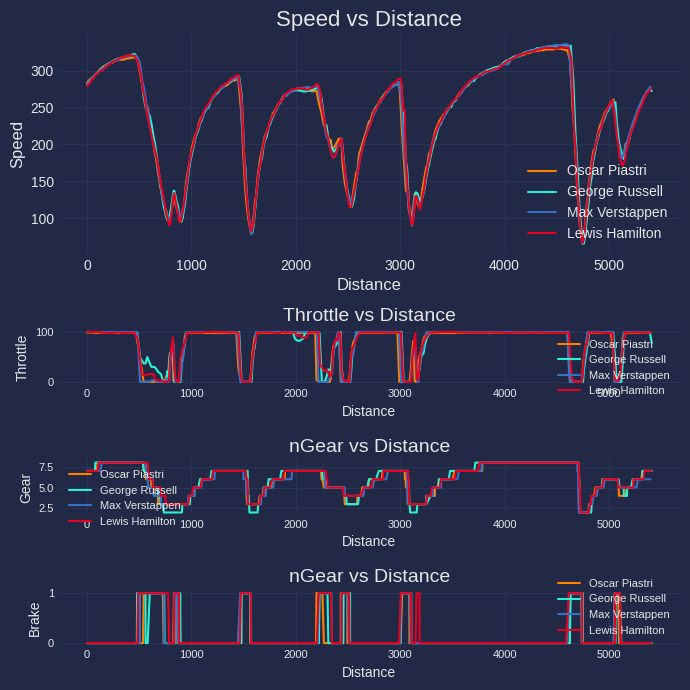

In [48]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = quali.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(4, 1, figsize=(7, 7), gridspec_kw={"height_ratios": [4, 1, 1, 1]})

ax[0].plot(
    tele_pia_quali.Distance, tele_pia_quali.Speed, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[0].plot(
    tele_rus_quali.Distance, tele_rus_quali.Speed, label="George Russell", color=get_driver_color("RUS")
)
ax[0].plot(
    tele_ver_quali.Distance, tele_ver_quali.Speed, label="Max Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_ham_quali.Distance, tele_ham_quali.Speed, label="Lewis Hamilton", color=get_driver_color("HAM")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)
ax[1].plot(
    tele_pia_quali.Distance, tele_pia_quali.Throttle, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[1].plot(
    tele_rus_quali.Distance, tele_rus_quali.Throttle, label="George Russell", color=get_driver_color("RUS")
)
ax[1].plot(
    tele_ver_quali.Distance, tele_ver_quali.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_ham_quali.Distance, tele_ham_quali.Throttle, label="Lewis Hamilton", color=get_driver_color("HAM")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)
ax[2].plot(
    tele_pia_quali.Distance, tele_pia_quali.nGear, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[2].plot(
    tele_rus_quali.Distance, tele_rus_quali.nGear, label="George Russell", color=get_driver_color("RUS")
)
ax[2].plot(
    tele_ver_quali.Distance, tele_ver_quali.nGear, label="Max Verstappen", color=get_driver_color("VER")
)
ax[2].plot(
    tele_ham_quali.Distance, tele_ham_quali.nGear, label="Lewis Hamilton", color=get_driver_color("HAM")
)

ax[2].set_title("nGear vs Distance", fontsize=14)
ax[2].set_xlabel("Distance", fontsize=10)
ax[2].set_ylabel("Gear", fontsize=10)
ax[2].legend(fontsize=8)
ax[2].grid(True)
ax[2].tick_params(axis="both", which="major", labelsize=8)
ax[3].plot(
    tele_pia_quali.Distance, tele_pia_quali.Brake, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[3].plot(
    tele_rus_quali.Distance, tele_rus_quali.Brake, label="George Russell", color=get_driver_color("RUS")
)
ax[3].plot(
    tele_ver_quali.Distance, tele_ver_quali.Brake, label="Max Verstappen", color=get_driver_color("VER")
)
ax[3].plot(
    tele_ham_quali.Distance, tele_ham_quali.Brake, label="Lewis Hamilton", color=get_driver_color("HAM")
)

ax[3].set_title("nGear vs Distance", fontsize=14)
ax[3].set_xlabel("Distance", fontsize=10)
ax[3].set_ylabel("Brake", fontsize=10)
ax[3].legend(fontsize=8)
ax[3].grid(True)
ax[3].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


In [49]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_quali_sec1),
        "Sector1Time": pia_quali_sec1,
        "Sector2Time": pia_quali_sec2,
        "Sector3Time": pia_quali_sec3,
        "Lap Time": pia_quali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_quali_sec1),
        "Sector1Time": rus_quali_sec1,
        "Sector2Time": rus_quali_sec2,
        "Sector3Time": rus_quali_sec3,
        "Lap Time": rus_quali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_quali_sec1),
        "Sector1Time": ver_quali_sec1,
        "Sector2Time": ver_quali_sec2,
        "Sector3Time": ver_quali_sec3,
        "Lap Time": ver_quali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Lewis Hamilton"] * len(ham_quali_sec1),
        "Sector1Time": ham_quali_sec1,
        "Sector2Time": ham_quali_sec2,
        "Sector3Time": ham_quali_sec3,
        "Lap Time": ham_quali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Oscar Piastri,0 days 00:00:24.176000,0 days 00:00:27.442000,0 days 00:00:39.973000,0 days 00:01:31.591000
2,Oscar Piastri,0 days 00:00:29.205000,0 days 00:00:31.339000,0 days 00:00:50.933000,0 days 00:01:51.477000
4,Oscar Piastri,0 days 00:00:24.252000,0 days 00:00:27.538000,0 days 00:00:40.137000,0 days 00:01:31.927000
5,Oscar Piastri,0 days 00:00:36.243000,0 days 00:00:39.914000,0 days 00:00:54.330000,0 days 00:02:10.487000
6,Oscar Piastri,0 days 00:00:37.431000,0 days 00:00:39.997000,0 days 00:00:55.098000,0 days 00:02:12.526000
7,Oscar Piastri,0 days 00:00:24.079000,0 days 00:00:27.440000,0 days 00:00:47.515000,0 days 00:01:39.034000
9,Oscar Piastri,0 days 00:00:24.219000,0 days 00:00:27.341000,0 days 00:00:39.640000,0 days 00:01:31.200000
10,Oscar Piastri,0 days 00:00:31.052000,0 days 00:00:33.180000,0 days 00:00:53.669000,0 days 00:01:57.901000
12,Oscar Piastri,0 days 00:00:24.103000,0 days 00:00:27.315000,0 days 00:00:39.827000,0 days 00:01:31.245000
13,Oscar Piastri,0 days 00:00:30.327000,0 days 00:00:32.984000,0 days 00:00:52.959000,0 days 00:01:56.270000


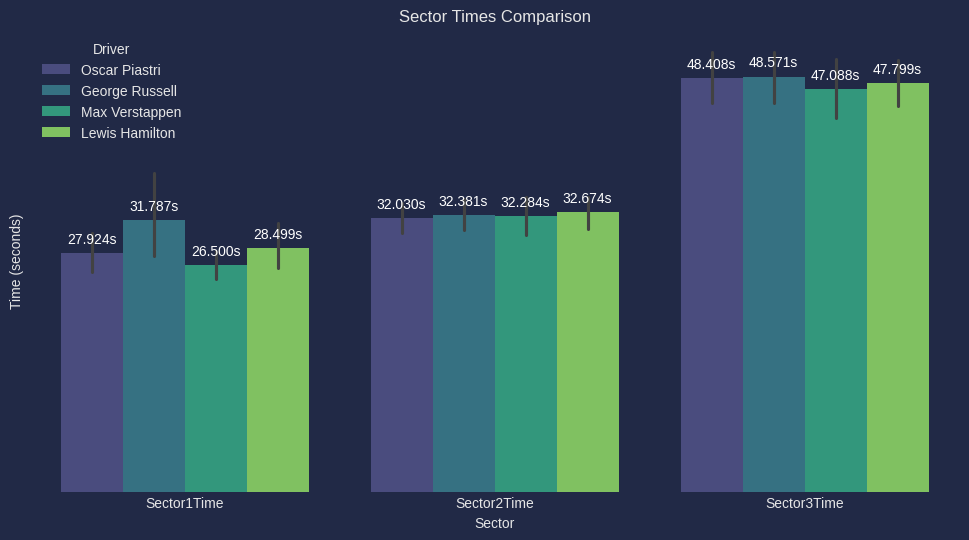

In [50]:
melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

melted_data["Time"] = melted_data["Time"].dt.total_seconds()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(
    data=melted_data, x="Sector", y="Time", hue="Driver", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        bar_plot.annotate(
            f"{height:.3f}s",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
        va="bottom",
            fontsize=10,
            color="white",
            xytext=(0, 5),
            textcoords="offset points",
        )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Sector")
plt.gca().set_yticks([])
plt.show()

*Race*

In [51]:
race = f1.get_session(2025, "China", "R")
race.load()

core           INFO 	Loading data for Chinese Grand Prix - Race [v3.5.3]


req            INFO 	Using cached data for session_info


req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data


req            INFO 	Using cached data for lap_count


req            INFO 	Using cached data for track_status_data


req            INFO 	Using cached data for _extended_timing_data


req            INFO 	Using cached data for timing_app_data


core           INFO 	Processing timing data...


req            INFO 	Using cached data for car_data


req            INFO 	Using cached data for position_data


req            INFO 	Using cached data for weather_data


req            INFO 	Using cached data for race_control_messages


core           INFO 	Finished loading data for 20 drivers: ['81', '4', '63', '1', '31', '12', '23', '87', '18', '55', '6', '30', '7', '5', '27', '22', '14', '16', '44', '10']


In [52]:
race.session_info

{'Meeting': {'Key': 1255,
  'Name': 'Chinese Grand Prix',
  'OfficialName': 'FORMULA 1 HEINEKEN CHINESE GRAND PRIX 2025',
  'Location': 'Shanghai',
  'Number': 2,
  'Country': {'Key': 53, 'Code': 'CHN', 'Name': 'China'},
  'Circuit': {'Key': 49, 'ShortName': 'Shanghai'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9998,
 'Type': 'Race',
 'Name': 'Race',
 'StartDate': datetime.datetime(2025, 3, 23, 15, 0),
 'EndDate': datetime.datetime(2025, 3, 23, 17, 0),
 'GmtOffset': datetime.timedelta(seconds=28800),
 'Path': '2025/2025-03-23_Chinese_Grand_Prix/2025-03-23_Race/'}

In [53]:
race.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
81,PIA,McLaren,1.0,1.0,0 days 01:30:55.026000,Finished
4,NOR,McLaren,3.0,2.0,0 days 00:00:09.748000,Finished
63,RUS,Mercedes,2.0,3.0,0 days 00:00:11.097000,Finished
1,VER,Red Bull Racing,4.0,4.0,0 days 00:00:16.656000,Finished
31,OCO,Haas F1 Team,11.0,5.0,0 days 00:00:49.969000,Finished
12,ANT,Mercedes,8.0,6.0,0 days 00:00:53.748000,Finished
23,ALB,Williams,10.0,7.0,0 days 00:00:56.321000,Finished
87,BEA,Haas F1 Team,17.0,8.0,0 days 00:01:01.303000,Finished
18,STR,Aston Martin,14.0,9.0,0 days 00:01:10.204000,Finished
55,SAI,Williams,15.0,10.0,0 days 00:01:16.387000,Finished


In [54]:
race_laps = race.laps
race_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:00:41.446000,PIA,81,0 days 00:01:38.344000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:28.932000,...,True,McLaren,0 days 00:59:02.863000,2025-03-23 07:03:38.698,12,1.0,False,,False,False
1,0 days 01:02:18.997000,PIA,81,0 days 00:01:37.551000,2.0,1.0,NaT,NaT,0 days 00:00:26.193000,0 days 00:00:29.261000,...,True,McLaren,0 days 01:00:41.446000,2025-03-23 07:05:17.281,1,1.0,False,,False,True
2,0 days 01:03:56.686000,PIA,81,0 days 00:01:37.689000,3.0,1.0,NaT,NaT,0 days 00:00:26.011000,0 days 00:00:29.486000,...,True,McLaren,0 days 01:02:18.997000,2025-03-23 07:06:54.832,12,1.0,False,,False,True
3,0 days 01:05:34.490000,PIA,81,0 days 00:01:37.804000,4.0,1.0,NaT,NaT,0 days 00:00:26.345000,0 days 00:00:29.430000,...,True,McLaren,0 days 01:03:56.686000,2025-03-23 07:08:32.521,1,1.0,False,,False,True
4,0 days 01:07:12.572000,PIA,81,0 days 00:01:38.082000,5.0,1.0,NaT,NaT,0 days 00:00:26.312000,0 days 00:00:29.729000,...,True,McLaren,0 days 01:05:34.490000,2025-03-23 07:10:10.325,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,0 days 02:24:37.173000,GAS,10,0 days 00:01:36.556000,52.0,2.0,NaT,NaT,0 days 00:00:25.628000,0 days 00:00:28.965000,...,True,Alpine,0 days 02:23:00.617000,2025-03-23 08:27:36.452,1,11.0,False,,False,True
1061,0 days 02:26:14.393000,GAS,10,0 days 00:01:37.220000,53.0,2.0,NaT,NaT,0 days 00:00:25.942000,0 days 00:00:29.123000,...,True,Alpine,0 days 02:24:37.173000,2025-03-23 08:29:13.008,1,11.0,False,,False,True
1062,0 days 02:27:51.668000,GAS,10,0 days 00:01:37.275000,54.0,2.0,NaT,NaT,0 days 00:00:25.836000,0 days 00:00:29.054000,...,True,Alpine,0 days 02:26:14.393000,2025-03-23 08:30:50.228,1,11.0,False,,False,True
1063,0 days 02:29:28.473000,GAS,10,0 days 00:01:36.805000,55.0,2.0,NaT,NaT,0 days 00:00:25.736000,0 days 00:00:28.913000,...,True,Alpine,0 days 02:27:51.668000,2025-03-23 08:32:27.503,1,11.0,False,,False,True


In [55]:
pia_race_laps = race.laps.pick_driver("PIA")
fastest_lap_pia_race = pia_race_laps.pick_fastest().LapTime
pia_race_lap_time = pia_race_laps["LapTime"]
pia_race_sec1 = pia_race_laps["Sector1Time"]
pia_race_sec2 = pia_race_laps["Sector2Time"]
pia_race_sec3 = pia_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_pia_race), "which was in Lap number" ,pia_race_laps.pick_fastest().LapNumber)
pia_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:35.520000 which was in Lap number 53.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,0 days 00:01:38.344000,NaT,0 days 00:00:28.932000,0 days 00:00:41.859000,277.0,272.0,256.0,308.0
1,0 days 00:01:37.551000,0 days 00:00:26.193000,0 days 00:00:29.261000,0 days 00:00:42.097000,278.0,271.0,255.0,311.0
2,0 days 00:01:37.689000,0 days 00:00:26.011000,0 days 00:00:29.486000,0 days 00:00:42.192000,275.0,272.0,256.0,310.0
3,0 days 00:01:37.804000,0 days 00:00:26.345000,0 days 00:00:29.430000,0 days 00:00:42.029000,271.0,269.0,256.0,313.0
4,0 days 00:01:38.082000,0 days 00:00:26.312000,0 days 00:00:29.729000,0 days 00:00:42.041000,273.0,270.0,256.0,313.0


In [56]:
fastest_lap_pia_race = pia_race_laps.pick_fastest()
tele_pia_race = fastest_lap_pia_race.get_telemetry().add_distance()
speed_pia_race = tele_pia_race.Speed
tele_pia_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,269.093749,7,10787.893702
3,270.343749,7,10877.143702
4,271.000000,7,10924.000000
5,273.242856,7,11019.321390
6,275.000000,7,11094.000000
...,...,...,...
723,263.000000,6,10433.000000
724,264.956114,6,10577.263410
725,266.962385,6,10725.225881
726,267.000000,7,10728.000000


In [57]:
rus_race_laps = race.laps.pick_driver("RUS")
fastest_lap_rus_race = rus_race_laps.pick_fastest().LapTime
rus_race_lap_time = rus_race_laps["LapTime"]
rus_race_sec1 = rus_race_laps["Sector1Time"]
rus_race_sec2 = rus_race_laps["Sector2Time"]
rus_race_sec3 = rus_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_rus_race), "which was in Lap number" ,rus_race_laps.pick_fastest().LapNumber)
rus_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:35.816000 which was in Lap number 55.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
112,0 days 00:01:40.282000,NaT,0 days 00:00:30.020000,0 days 00:00:42.264000,287.0,272.0,254.0,312.0
113,0 days 00:01:37.463000,0 days 00:00:26.031000,0 days 00:00:29.608000,0 days 00:00:41.824000,282.0,272.0,264.0,332.0
114,0 days 00:01:37.774000,0 days 00:00:26.036000,0 days 00:00:29.665000,0 days 00:00:42.073000,278.0,273.0,264.0,333.0
115,0 days 00:01:37.643000,0 days 00:00:26.146000,0 days 00:00:29.688000,0 days 00:00:41.809000,275.0,272.0,263.0,333.0
116,0 days 00:01:37.821000,0 days 00:00:26.327000,0 days 00:00:29.723000,0 days 00:00:41.771000,277.0,271.0,264.0,336.0


In [58]:
fastest_lap_rus_race = rus_race_laps.pick_fastest()
tele_rus_race = fastest_lap_rus_race.get_telemetry().add_distance()
speed_rus_race = tele_rus_race.Speed
tele_rus_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,271.625000,7,11090.875000
3,272.000000,7,11091.000000
4,275.000000,7,11276.000000
5,275.200000,7,11283.300000
6,277.950000,7,11383.675000
...,...,...,...
726,263.725001,7,10864.875053
727,267.625001,7,11079.375053
728,268.000000,7,11100.000000
729,271.482144,7,11141.089299


In [59]:
ver_race_laps = race.laps.pick_driver("VER")
fastest_lap_ver_race = ver_race_laps.pick_fastest().LapTime
ver_race_lap_time = ver_race_laps["LapTime"]
ver_race_sec1 = ver_race_laps["Sector1Time"]
ver_race_sec2 = ver_race_laps["Sector2Time"]
ver_race_sec3 = ver_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_race), "which was in Lap number" ,ver_race_laps.pick_fastest().LapNumber)
ver_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:35.488000 which was in Lap number 56.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
168,0 days 00:01:42.249000,NaT,0 days 00:00:30.530000,0 days 00:00:42.425000,278.0,274.0,258.0,314.0
169,0 days 00:01:38.304000,0 days 00:00:26.397000,0 days 00:00:29.966000,0 days 00:00:41.941000,282.0,271.0,263.0,337.0
170,0 days 00:01:38.302000,0 days 00:00:26.331000,0 days 00:00:29.992000,0 days 00:00:41.979000,279.0,272.0,263.0,334.0
171,0 days 00:01:38.614000,0 days 00:00:26.373000,0 days 00:00:30.050000,0 days 00:00:42.191000,278.0,271.0,257.0,316.0
172,0 days 00:01:38.895000,0 days 00:00:26.600000,0 days 00:00:30.175000,0 days 00:00:42.120000,NaN,270.0,258.0,314.0


In [60]:
fastest_lap_ver_race = ver_race_laps.pick_fastest()
tele_ver_race = fastest_lap_ver_race.get_telemetry().add_distance()
speed_ver_race = tele_ver_race.Speed
tele_ver_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,270.785715,7,10767.821453
3,272.214287,7,10805.678596
4,274.000000,7,10853.000000
5,274.575000,7,10900.725027
6,275.000000,7,10936.000000
...,...,...,...
727,262.437501,6,11265.468658
728,264.000000,6,11085.000000
729,266.000000,6,10599.000000
730,266.625001,6,10623.500045


In [61]:
sai_race_laps = race.laps.pick_driver("SAI")
fastest_lap_sai_race = sai_race_laps.pick_fastest().LapTime
sai_race_lap_time = sai_race_laps["LapTime"]
sai_race_sec1 = sai_race_laps["Sector1Time"]
sai_race_sec2 = sai_race_laps["Sector2Time"]
sai_race_sec3 = sai_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_sai_race), "which was in Lap number" ,sai_race_laps.pick_fastest().LapNumber)
sai_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:36.779000 which was in Lap number 50.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
504,0 days 00:01:47.312000,NaT,0 days 00:00:32.280000,0 days 00:00:43.813000,284.0,272.0,255.0,321.0
505,0 days 00:01:39.718000,0 days 00:00:26.361000,0 days 00:00:30.511000,0 days 00:00:42.846000,279.0,271.0,263.0,336.0
506,0 days 00:01:39.270000,0 days 00:00:26.290000,0 days 00:00:30.258000,0 days 00:00:42.722000,275.0,272.0,263.0,335.0
507,0 days 00:01:38.789000,0 days 00:00:26.343000,0 days 00:00:30.062000,0 days 00:00:42.384000,276.0,270.0,263.0,334.0
508,0 days 00:01:38.787000,0 days 00:00:26.386000,0 days 00:00:30.262000,0 days 00:00:42.139000,NaN,270.0,264.0,335.0


In [62]:
fastest_lap_sai_race = sai_race_laps.pick_fastest()
tele_sai_race = fastest_lap_sai_race.get_telemetry().add_distance()
speed_sai_race = tele_sai_race.Speed
tele_sai_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,266.125005,7,11001.500096
3,270.000000,7,11079.000000
4,271.114288,7,11123.850074
5,273.685716,7,11227.350074
6,274.000000,7,11240.000000
...,...,...,...
724,260.000000,7,10708.000000
725,261.712502,7,10793.282620
726,263.962502,7,10905.332620
727,265.000000,7,10957.000000


In [63]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_race_sec1),
        "Sector1Time": pia_race_sec1,
        "Sector2Time": pia_race_sec2,
        "Sector3Time": pia_race_sec3,
        "Lap Time": pia_race_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_race_sec1),
        "Sector1Time": rus_race_sec1,
        "Sector2Time": rus_race_sec2,
        "Sector3Time": rus_race_sec3,
        "Lap Time": rus_race_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_race_sec1),
        "Sector1Time": ver_race_sec1,
        "Sector2Time": ver_race_sec2,
        "Sector3Time": ver_race_sec3,
        "Lap Time": ver_race_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Carlos Sainz"] * len(sai_race_sec1),
        "Sector1Time": sai_race_sec1,
        "Sector2Time": sai_race_sec2,
        "Sector3Time": sai_race_sec3,
        "Lap Time": sai_race_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Oscar Piastri,0 days 00:00:26.193000,0 days 00:00:29.261000,0 days 00:00:42.097000,0 days 00:01:37.551000
2,Oscar Piastri,0 days 00:00:26.011000,0 days 00:00:29.486000,0 days 00:00:42.192000,0 days 00:01:37.689000
3,Oscar Piastri,0 days 00:00:26.345000,0 days 00:00:29.430000,0 days 00:00:42.029000,0 days 00:01:37.804000
4,Oscar Piastri,0 days 00:00:26.312000,0 days 00:00:29.729000,0 days 00:00:42.041000,0 days 00:01:38.082000
5,Oscar Piastri,0 days 00:00:26.187000,0 days 00:00:29.451000,0 days 00:00:41.901000,0 days 00:01:37.539000
...,...,...,...,...,...
219,Carlos Sainz,0 days 00:00:25.843000,0 days 00:00:29.087000,0 days 00:00:42.035000,0 days 00:01:36.965000
220,Carlos Sainz,0 days 00:00:26.082000,0 days 00:00:29.194000,0 days 00:00:42.305000,0 days 00:01:37.581000
221,Carlos Sainz,0 days 00:00:26.047000,0 days 00:00:29.228000,0 days 00:00:41.817000,0 days 00:01:37.092000
222,Carlos Sainz,0 days 00:00:25.916000,0 days 00:00:29.157000,0 days 00:00:42.356000,0 days 00:01:37.429000


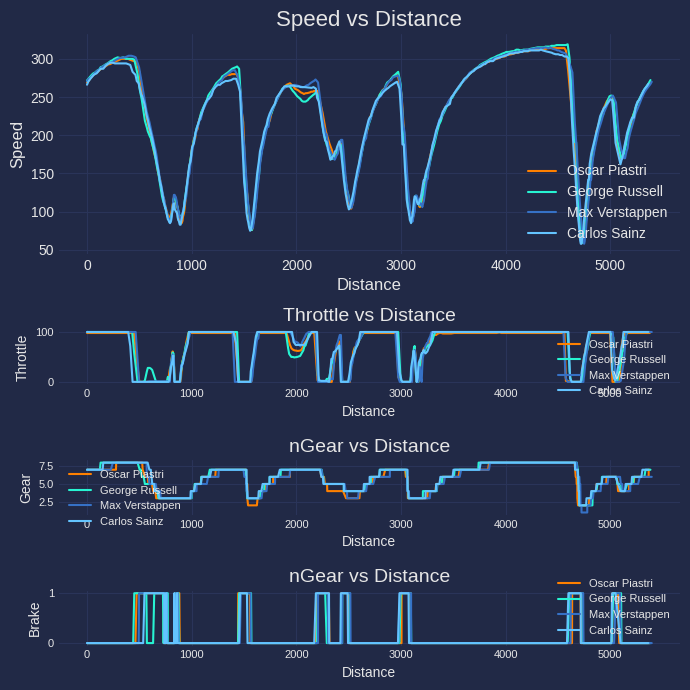

In [64]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = race.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(4, 1, figsize=(7, 7), gridspec_kw={"height_ratios": [4, 1, 1, 1]})

ax[0].plot(
    tele_pia_race.Distance, tele_pia_race.Speed, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[0].plot(
    tele_rus_race.Distance, tele_rus_race.Speed, label="George Russell", color=get_driver_color("RUS")
)
ax[0].plot(
    tele_ver_race.Distance, tele_ver_race.Speed, label="Max Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_sai_race.Distance, tele_sai_race.Speed, label="Carlos Sainz", color=get_driver_color("SAI")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)
ax[1].plot(
    tele_pia_race.Distance, tele_pia_race.Throttle, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[1].plot(
    tele_rus_race.Distance, tele_rus_race.Throttle, label="George Russell", color=get_driver_color("RUS")
)
ax[1].plot(
    tele_ver_race.Distance, tele_ver_race.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_sai_race.Distance, tele_sai_race.Throttle, label="Carlos Sainz", color=get_driver_color("SAI")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)
ax[2].plot(
    tele_pia_race.Distance, tele_pia_race.nGear, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[2].plot(
    tele_rus_race.Distance, tele_rus_race.nGear, label="George Russell", color=get_driver_color("RUS")
)
ax[2].plot(
    tele_ver_race.Distance, tele_ver_race.nGear, label="Max Verstappen", color=get_driver_color("VER")
)
ax[2].plot(
    tele_sai_race.Distance, tele_sai_race.nGear, label="Carlos Sainz", color=get_driver_color("SAI")
)

ax[2].set_title("nGear vs Distance", fontsize=14)
ax[2].set_xlabel("Distance", fontsize=10)
ax[2].set_ylabel("Gear", fontsize=10)
ax[2].legend(fontsize=8)
ax[2].grid(True)
ax[2].tick_params(axis="both", which="major", labelsize=8)
ax[3].plot(
    tele_pia_race.Distance, tele_pia_race.Brake, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[3].plot(
    tele_rus_race.Distance, tele_rus_race.Brake, label="George Russell", color=get_driver_color("RUS")
)
ax[3].plot(
    tele_ver_race.Distance, tele_ver_race.Brake, label="Max Verstappen", color=get_driver_color("VER")
)
ax[3].plot(
    tele_sai_race.Distance, tele_sai_race.Brake, label="Carlos Sainz", color=get_driver_color("SAI")
)

ax[3].set_title("nGear vs Distance", fontsize=14)
ax[3].set_xlabel("Distance", fontsize=10)
ax[3].set_ylabel("Brake", fontsize=10)
ax[3].legend(fontsize=8)
ax[3].grid(True)
ax[3].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


In [65]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_race_sec1),
        "Sector1Time": pia_race_sec1,
        "Sector2Time": pia_race_sec2,
        "Sector3Time": pia_race_sec3,
        "Lap Time": pia_race_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_race_sec1),
        "Sector1Time": rus_race_sec1,
        "Sector2Time": rus_race_sec2,
        "Sector3Time": rus_race_sec3,
        "Lap Time": rus_race_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_race_sec1),
        "Sector1Time": ver_race_sec1,
        "Sector2Time": ver_race_sec2,
        "Sector3Time": ver_race_sec3,
        "Lap Time": ver_race_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Carlos Sainz"] * len(sai_race_sec1),
        "Sector1Time": sai_race_sec1,
        "Sector2Time": sai_race_sec2,
        "Sector3Time": sai_race_sec3,
        "Lap Time": sai_race_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Oscar Piastri,0 days 00:00:26.193000,0 days 00:00:29.261000,0 days 00:00:42.097000,0 days 00:01:37.551000
2,Oscar Piastri,0 days 00:00:26.011000,0 days 00:00:29.486000,0 days 00:00:42.192000,0 days 00:01:37.689000
3,Oscar Piastri,0 days 00:00:26.345000,0 days 00:00:29.430000,0 days 00:00:42.029000,0 days 00:01:37.804000
4,Oscar Piastri,0 days 00:00:26.312000,0 days 00:00:29.729000,0 days 00:00:42.041000,0 days 00:01:38.082000
5,Oscar Piastri,0 days 00:00:26.187000,0 days 00:00:29.451000,0 days 00:00:41.901000,0 days 00:01:37.539000
...,...,...,...,...,...
219,Carlos Sainz,0 days 00:00:25.843000,0 days 00:00:29.087000,0 days 00:00:42.035000,0 days 00:01:36.965000
220,Carlos Sainz,0 days 00:00:26.082000,0 days 00:00:29.194000,0 days 00:00:42.305000,0 days 00:01:37.581000
221,Carlos Sainz,0 days 00:00:26.047000,0 days 00:00:29.228000,0 days 00:00:41.817000,0 days 00:01:37.092000
222,Carlos Sainz,0 days 00:00:25.916000,0 days 00:00:29.157000,0 days 00:00:42.356000,0 days 00:01:37.429000


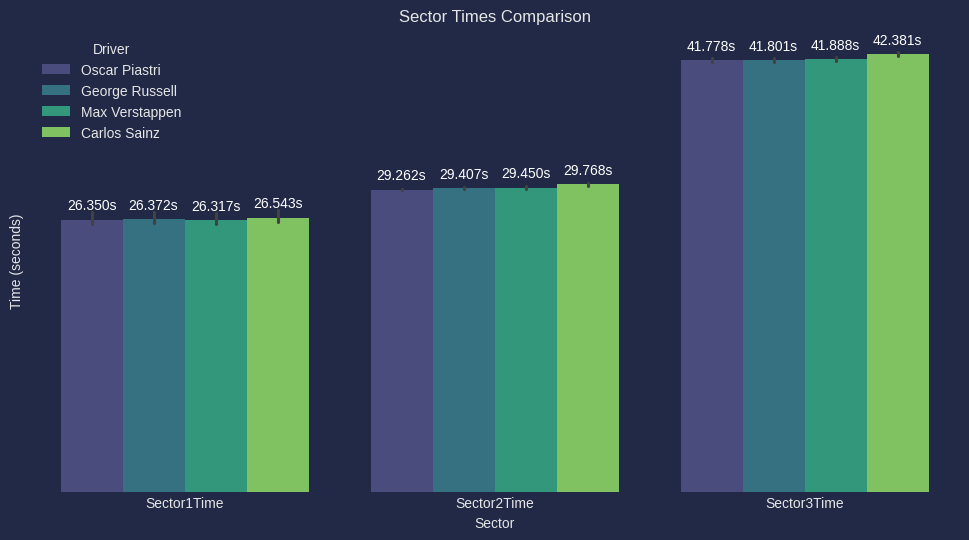

In [66]:
melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

melted_data["Time"] = melted_data["Time"].dt.total_seconds()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(
    data=melted_data, x="Sector", y="Time", hue="Driver", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        bar_plot.annotate(
            f"{height:.3f}s",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
        va="bottom",
            fontsize=10,
            color="white",
            xytext=(0, 5),
            textcoords="offset points",
        )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Sector")
plt.gca().set_yticks([])
plt.show()

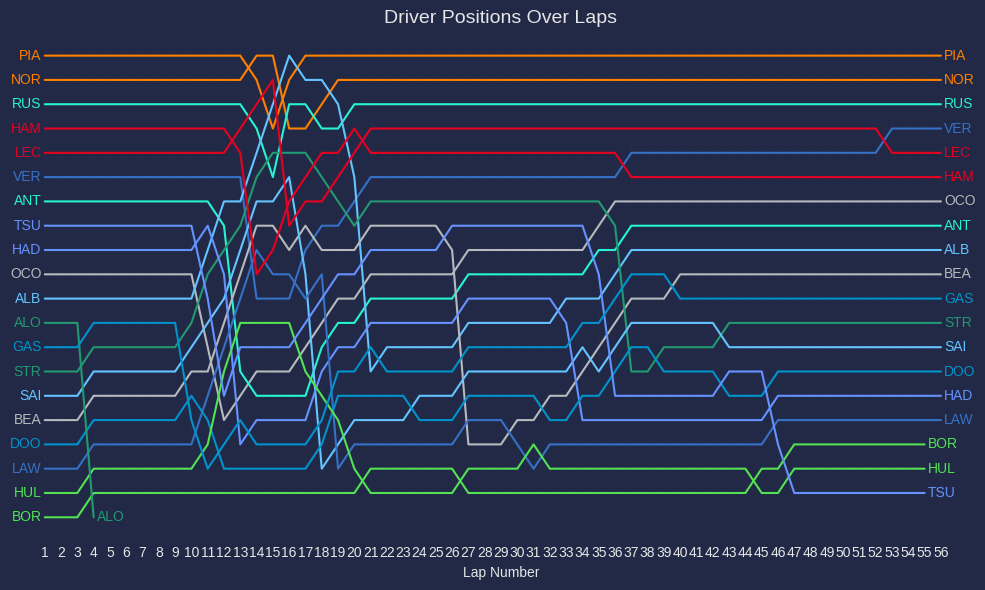

In [67]:
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
nlaps = int(race.laps.LapNumber.unique().max())

team_colors = {}

for driver in drivers_ab:
    driver_object = race.get_driver(driver)
    hex_color = driver_object.TeamColor
    team_colors[driver] = hex_to_rgb(hex_color)

plt.figure(figsize=(10, 6))
for driver in drivers_ab:
    positions = race_laps[race_laps['Driver'] == driver]['Position'].values  
    color = team_colors.get(driver, (0.5, 0.5, 0.5))
    plt.plot(range(1, len(positions) + 1), positions, label=driver, color=color)
    
    plt.text(
        1 - 0.2,
        positions[0],
        driver,
        color=color,
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='right'
    )
    
    plt.text(
        len(positions) + 0.2,
        positions[-1],
        driver,
        color=color,
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='left'
    )

plt.title("Driver Positions Over Laps", fontsize=14)
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(0.5, float(nlaps) + 1.5)
plt.xlabel("Lap Number")
plt.ylim(0, 21)
plt.gca().invert_yaxis()
plt.gca().set_yticks([])
plt.xticks(range(1, nlaps + 1))
plt.tight_layout()
plt.show()

/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.wa

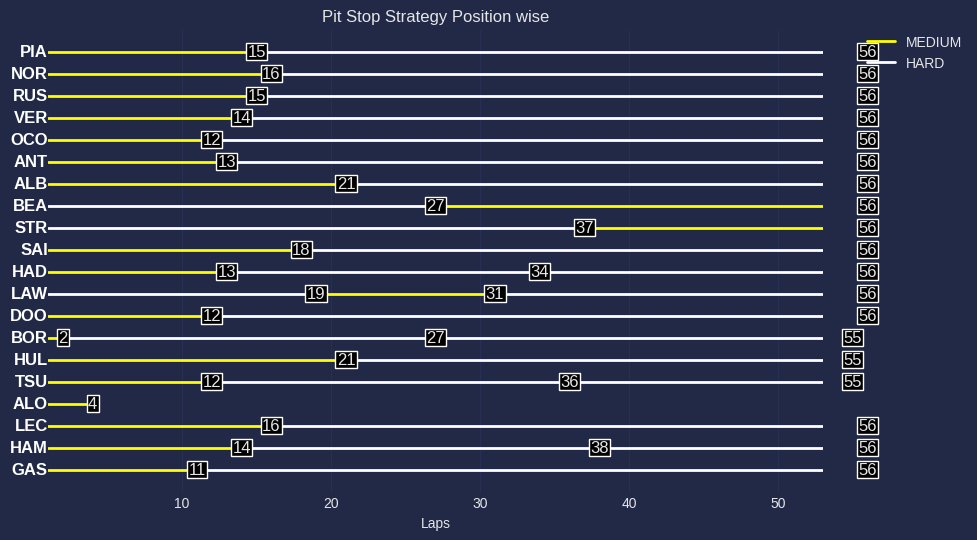

In [68]:
def getDriverPosition(abbreviation: str):
    res = race.results
    abbr = res["Abbreviation"] == abbreviation
    pos = res.loc[abbr, ["Position"]]
    posi = pos.iloc[-1]
    return int(posi.iloc[0])


def getCompound(abbreviation: str):
    driver_race = race.laps.pick_driver(abbreviation)
    lastLap = driver_race.LapNumber.count()
    if driver_race["TyreLife"].iloc[0] == 1.0:
        condition = driver_race["TyreLife"] == 1
        driver_comp = driver_race.loc[condition, ["Compound", "LapNumber"]]
        compound = driver_comp.Compound.tolist()
        return compound, driver_comp, lastLap
    else:
        compound = []
        result = []
        for i in range(0, len(driver_race["TyreLife"])):
            if driver_race["TyreLife"].iloc[i] < driver_race["TyreLife"].iloc[i - 1]:
                result.append(
                    {
                        "Compound": driver_race["Compound"].iloc[i],
                        "LapNumber": driver_race["LapNumber"].iloc[i],
                    }
                )
                compound.append(driver_race["Compound"].iloc[i])

        driver_comp = pd.DataFrame(result)
        return compound, driver_comp, lastLap


fig, ax = plt.subplots(figsize=(10, 6))

color_mapping = {
    "MEDIUM": "yellow",
    "SOFT": "red",
    "HARD": "white",
    "INTERMEDIATE": "green",
    "WET": "blue",
}
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
used_labels = set()
for driver in drivers_ab:
    compound, driver_comp, lastLap = getCompound(driver)

    list1 = driver_comp.LapNumber.tolist()
    list1.append(lastLap)
    int_list = [int(x) for x in list1]
    x_points = int_list
    n = len(int_list)
    posi = getDriverPosition(driver)
    y_points = [posi] * n

    for i in range(len(driver_comp.LapNumber)):
        x_segment = [x_points[i], x_points[i + 1]]
        y_segment = [y_points[i], y_points[i + 1]]
        tire_color = color_mapping.get(compound[i], "#000000")
        label = compound[i] if compound[i] not in used_labels else None
        
        ax.plot(x_segment, y_segment, color=tire_color, linewidth=2, label=label)
        used_labels.add(compound[i])

        ax.text(
            x_points[i + 1],
            y_points[i + 1],
            str(x_points[i + 1]),
            fontsize=12,
            ha="center",
            va="center",
            bbox=dict(facecolor="black", edgecolor="white", pad=1),
        )
        ax.annotate(f'{i}',
                xy=(0, 1),
                xytext=(-10, 0),
                textcoords='offset points',
                va='center',
                ha='right',
                color="white",
                fontweight='bold')
    ax.text(
        x_points[0], 
        y_points[0], 
        driver, 
        fontsize=12, 
        ha='right', 
        va='center', 
        color="white", 
        fontweight='bold',
    )
    
ax.set_xlim(1, 53)
ax.invert_yaxis()
ax.set_ylim(21, 0)
ax.set_title("Pit Stop Strategy Position wise")
ax.set_xlabel("Laps")
plt.gca().set_yticks([])
ax.axvline(x=0, color='black', linewidth=2)
ax.grid(True, linestyle="-", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.show()

In [69]:
res = race.results
drivers = res['Abbreviation'].tolist()
fastest_speed = pd.DataFrame(columns=['Driver', 'Speed'])
for i in drivers:
    tele = race.laps.pick_driver(i)
    speed = tele.SpeedST.max()
    df = pd.DataFrame({'Driver': [i], 'Speed': [speed]})
    fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)
fastest_speed.sort_values(by="Speed",ascending=True)


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/tmp/ipykernel_36347/905247657.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)


,Driver,Speed
14,HUL,331.0
16,ALO,333.0
13,BOR,336.0
9,SAI,336.0
19,GAS,337.0
11,LAW,337.0
0,PIA,338.0
6,ALB,338.0
15,TSU,338.0
1,NOR,339.0


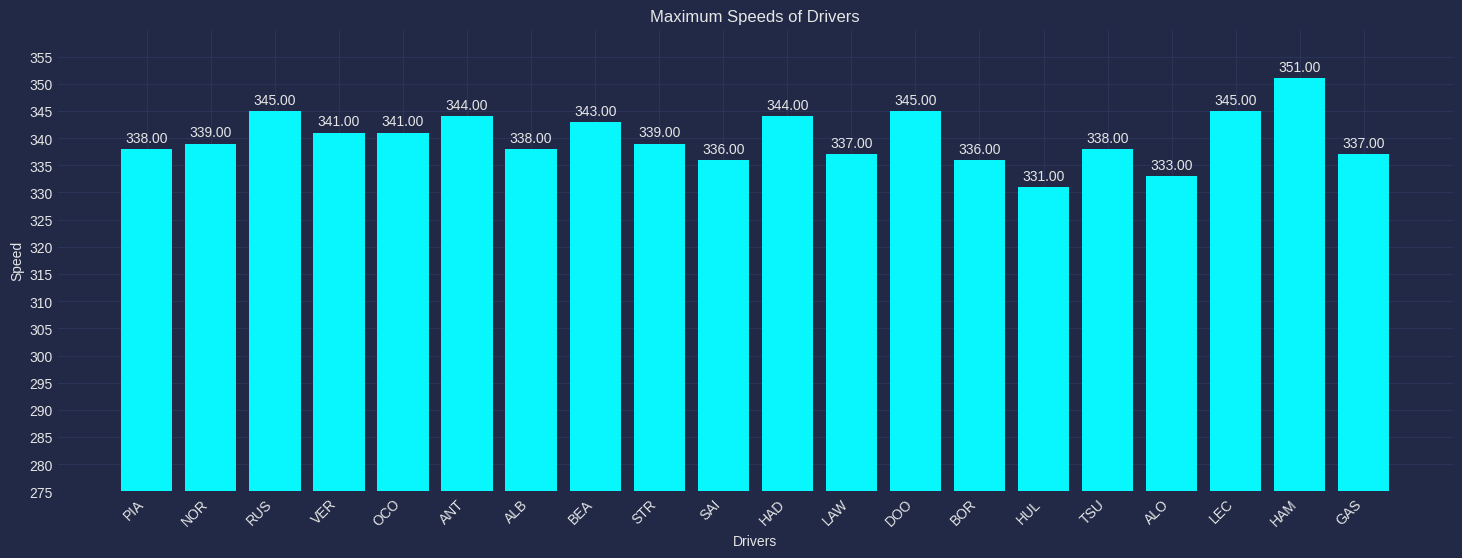

In [70]:
fig,ax = plt.subplots(figsize=(18, 6))
bars = ax.bar(fastest_speed['Driver'], fastest_speed['Speed'])
ax.set_xlabel('Drivers')
ax.set_ylabel('Speed')
ax.set_title('Maximum Speeds of Drivers')
plt.xticks(rotation=45, ha='right')

y_min = 275
y_max = np.ceil(fastest_speed['Speed'].max() / 5) * 5 + 5
y_ticks = np.arange(y_min, y_max, 5)
ax.set_ylim(y_min, y_max)
ax.set_yticks(y_ticks)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

*Pace Comparison*

In [71]:
plotting.setup_mpl()

/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


In [72]:
laps_ver = race_laps.pick_driver("VER")
laps_pia = race_laps.pick_driver("PIA")

fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_pia = laps_pia.pick_fastest().get_telemetry().add_distance()

fastest_ver["Driver"] = "VER"
fastest_pia["Driver"] = "PIA"
telemetry = pd.concat([fastest_ver,fastest_pia])

/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [73]:
num_minisectors = 25
total_distance = total_distance = max(telemetry['Distance'])
minisector_length = total_distance / num_minisectors
minisectors = [0]
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [74]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,PIA,282.296441
1,1,VER,284.231076
2,2,PIA,298.022255
3,2,VER,300.261970
4,3,PIA,236.754539
5,3,VER,244.600593
6,4,PIA,119.443010
7,4,VER,117.828888
8,5,PIA,132.458056
9,5,VER,142.857269


In [75]:
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})


In [76]:
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

telemetry = telemetry.sort_values(by=['Distance'])

telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'PIA', 'Fastest_driver_int'] = 2

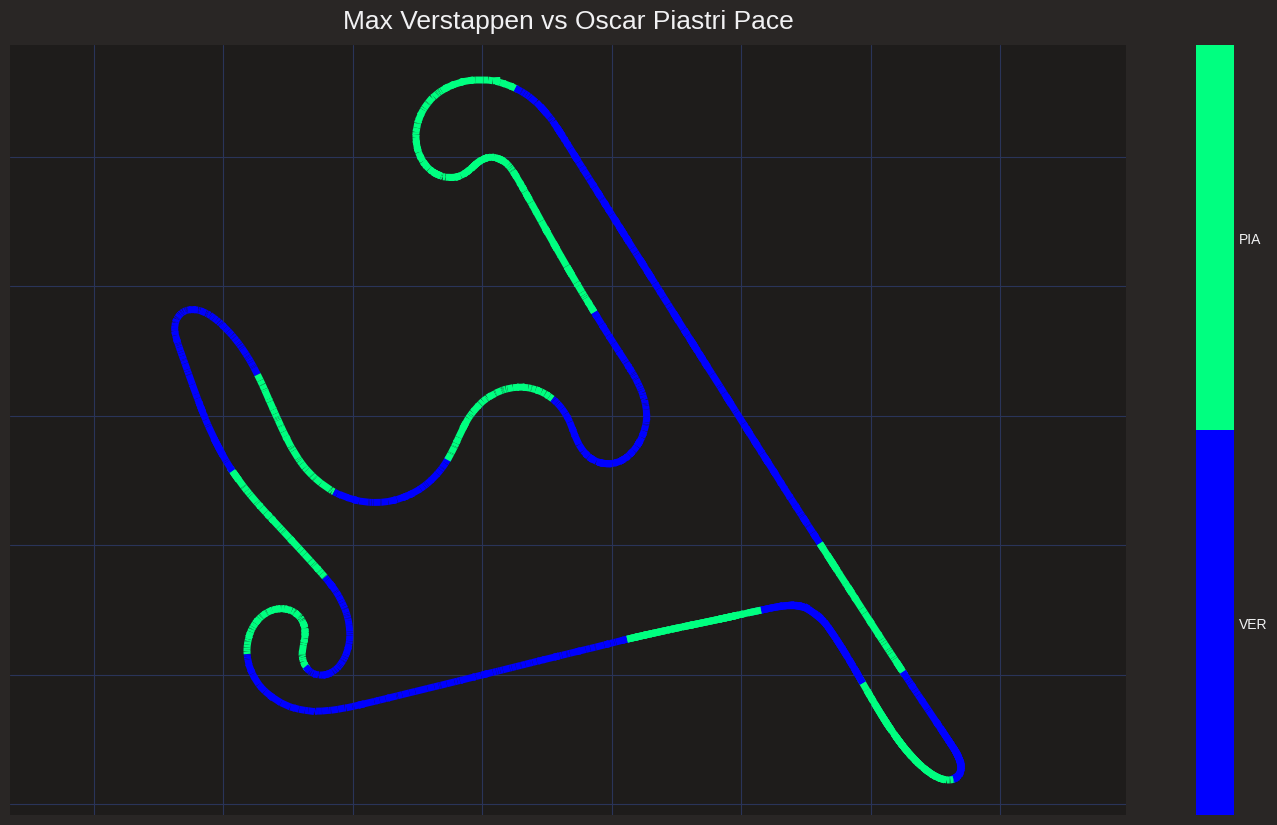

In [77]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = plt.get_cmap('winter', 2)  # Create a colormap with 2 colors
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

cbar = plt.colorbar(mappable=lc_comp, boundaries=[1, 2, 3])
cbar.set_ticks([1.5, 2.5])
cbar.set_ticklabels(['VER', 'PIA'])
plt.title("Max Verstappen vs Oscar Piastri Pace")
plt.show()
